<a href="https://colab.research.google.com/github/alivahidi75/ANN_KNTU/blob/main/MiniProjects3(Ali_vahidi_40300916_Ali_Ahmadi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import gdown
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Section1

1.1 SVM

     pcost       dcost       gap    pres   dres
 0: -5.6948e-01 -6.6918e+00  6e+00  3e-16  5e-16
 1: -6.1573e-01 -9.0209e-01  3e-01  1e-16  4e-16
 2: -6.2499e-01 -6.3144e-01  6e-03  1e-16  3e-16
 3: -6.2500e-01 -6.2506e-01  6e-05  2e-16  3e-16
 4: -6.2500e-01 -6.2500e-01  6e-07  1e-16  3e-16
 5: -6.2500e-01 -6.2500e-01  6e-09  1e-16  5e-16
Optimal solution found.
alphas = [0.14075446 0.25435332 0.31467666 0.16956888 0.37064668]
w = [-5.00000002e-01  3.48869544e-10  1.00000000e+00]
b = -1.5000000056680733


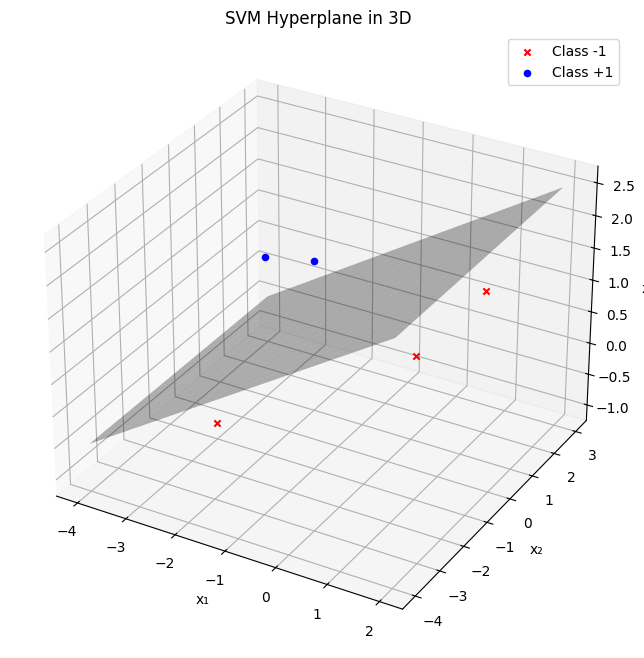

In [ ]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

X = np.array([
    [1, -1, 1],
    [-3, 1, 1],
    [-3, -1,-1],
    [1, 2, 1],
    [-1, -1, 2],
])

y = np.array([-1, 1, -1, -1, 1])

n = X.shape[0]

K = np.dot(X, X.T)

P = matrix((np.outer(y, y) * K).astype('double'))
q = matrix(-np.ones(n))
G = matrix(np.vstack((-np.eye(n), np.eye(n))))
h = matrix(np.hstack((np.zeros(n), np.ones(n))))  # C = 1.0
A = matrix(y.astype(float), (1, n))
b = matrix(0.0)


sol = solvers.qp(P, q, G, h, A, b)
alphas = np.ravel(sol['x'])


sv = alphas > 1e-5
sv_idx = np.where(sv)[0]
alphas = alphas[sv]
sv_X = X[sv]
sv_y = y[sv]

w = np.sum(alphas[:, None] * sv_y[:, None] * sv_X, axis=0)
b = np.mean(sv_y - np.dot(sv_X, w))

print("alphas =", alphas)
print("w =", w)
print("b =", b)



from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


has_label_pos = False
has_label_neg = False

for i in range(n):
    if y[i] == 1:
        label = "Class +1" if not has_label_pos else ""
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='b', marker='o', label=label)
        has_label_pos = True
    else:
        label = "Class -1" if not has_label_neg else ""
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='r', marker='x', label=label)
        has_label_neg = True

xx, yy = np.meshgrid(np.linspace(-4, 2, 20), np.linspace(-4, 3, 20))
zz = -(w[0]*xx + w[1]*yy + b) / w[2]

ax.plot_surface(xx, yy, zz, color='k', alpha=0.3)

ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("x₃")
ax.set_title("SVM Hyperplane in 3D")
plt.legend()
plt.show()

1.2.1) importing dataset

In [ ]:
file_id = "1HseyPM4cJilpFjGYcHXsC-wODg_AfPNa"

gdown.download(f"https://drive.google.com/uc?id={file_id}", "PRSA_data_2010.1.1-2014.12.31.csv", quiet=False)

df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv", encoding="latin1")


Downloading...
From: https://drive.google.com/uc?id=1HseyPM4cJilpFjGYcHXsC-wODg_AfPNa
To: /content/PRSA_data_2010.1.1-2014.12.31.csv
100%|██████████| 2.01M/2.01M [00:00<00:00, 128MB/s]


In [ ]:
df.head(20)
p = df

Plotting corrolation and Histogram

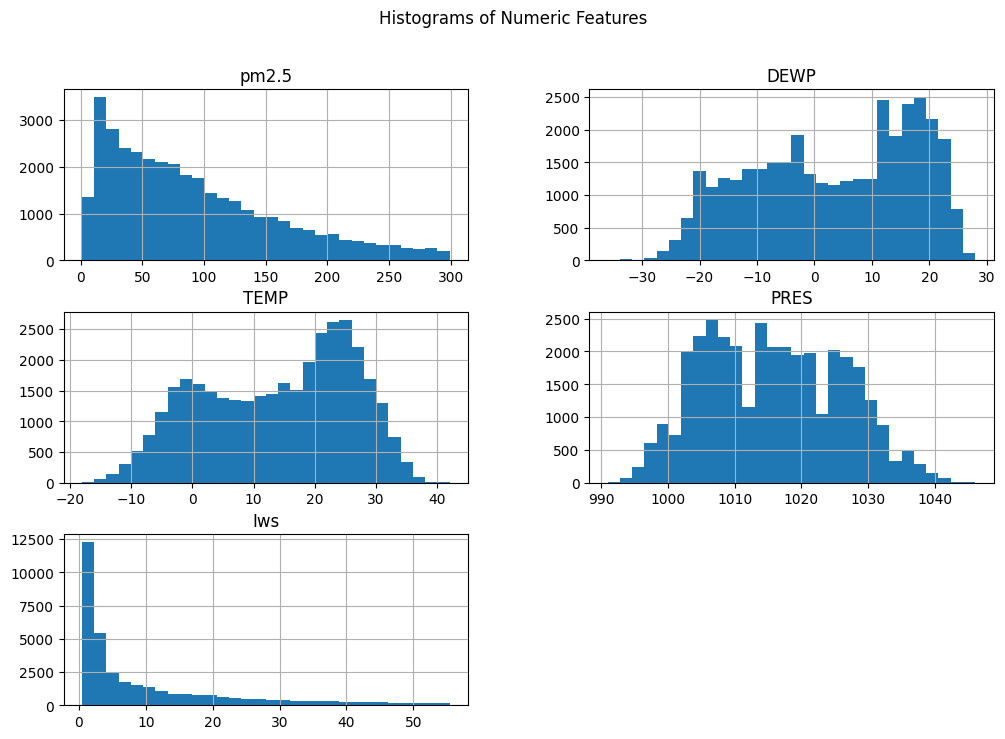

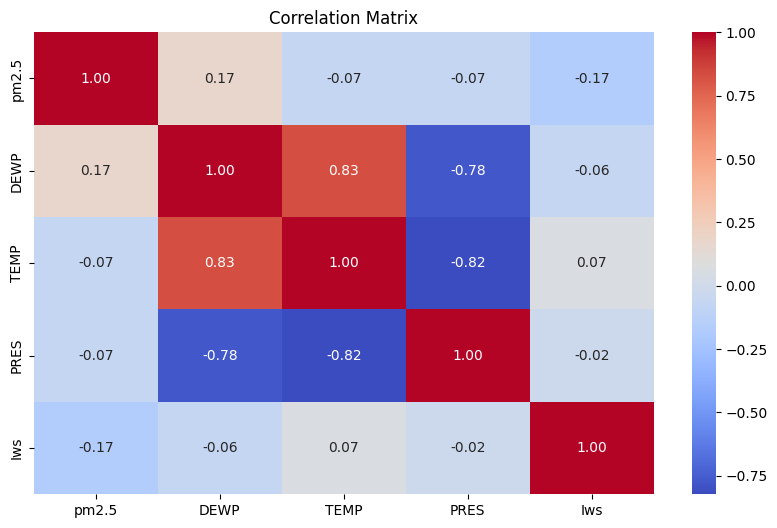

In [ ]:
numeric_cols = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']
p[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features")
plt.show()


plt.figure(figsize=(10, 6))
corr_matrix = p[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

1.2.3

findding nan values

In [ ]:
print("rows with missing values:",df.isnull().sum() )
print("sum of missing values:",df.isnull().sum().sum() )

rows with missing values: datetime                0
No                      0
year                    0
month                   0
day                     0
hour                    0
pm2.5                   0
DEWP                    0
TEMP                    0
PRES                    0
cbwd                    0
Iws                     0
Is                      0
Ir                      0
pm2.5_category          0
pm2.5_lag2              0
pm2.5_lag24             0
pm2.5_rolling_mean24    0
pm2.5_rolling_var24     0
pm2.5_rolling_std24     0
hour_sin                0
hour_cos                0
day_sin                 0
day_cos                 0
month_sin               0
month_cos               0
season                  0
day_of_week             0
weekly_index            0
cbwd_numeric            0
dtype: int64
sum of missing values: 0


filling nan values

In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

df['pm2.5'] = df['pm2.5'].bfill(limit=25)
df['pm2.5'] = df['pm2.5'].interpolate(method='time')

print("rows with missing values:",df.isnull().sum() )
print("sum of missing values:",df.isnull().sum().sum() )

rows with missing values: No                      0
year                    0
month                   0
day                     0
hour                    0
pm2.5                   0
DEWP                    0
TEMP                    0
PRES                    0
cbwd                    0
Iws                     0
Is                      0
Ir                      0
pm2.5_category          0
pm2.5_lag2              0
pm2.5_lag24             0
pm2.5_rolling_mean24    0
pm2.5_rolling_var24     0
pm2.5_rolling_std24     0
hour_sin                0
hour_cos                0
day_sin                 0
day_cos                 0
month_sin               0
month_cos               0
season                  0
day_of_week             0
weekly_index            0
cbwd_numeric            0
dtype: int64
sum of missing values: 0


1.2.4

categorical dataset

In [ ]:
print(df.dtypes)
has_categorical = any(df.dtypes == 'object') or any(df.dtypes == 'category')
print(" categorical features?", has_categorical)

No                         int64
year                       int64
month                      int64
day                        int64
hour                       int64
pm2.5                    float64
DEWP                       int64
TEMP                     float64
PRES                     float64
cbwd                      object
Iws                      float64
Is                         int64
Ir                         int64
pm2.5_category          category
pm2.5_lag2               float64
pm2.5_lag24              float64
pm2.5_rolling_mean24     float64
pm2.5_rolling_var24      float64
pm2.5_rolling_std24      float64
hour_sin                 float64
hour_cos                 float64
day_sin                  float64
day_cos                  float64
month_sin                float64
month_cos                float64
season                    object
day_of_week                int32
weekly_index               int32
cbwd_numeric               int64
dtype: object
 categorical features? True


Encoding categorical dataset to numerical dataset

In [ ]:
print(df['cbwd'].unique())

cbwd_mapping = {
    'NW': 0,
    'cv': 1,
    'SE': 2,
    'NE': 3
}
df['cbwd_numeric']  = df['cbwd'].map(cbwd_mapping)


['SE' 'cv' 'NW' 'NE']


1.2.5

outlier detection

In [ ]:
columns = ['pm2.5', 'TEMP', 'DEWP', 'Iws']
outlier_samples = {}

def outlier_detection(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)

  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  uper_bound = Q3 + 1.5*IQR

  outliers = series[(series<lower_bound)|(series>uper_bound)]
  return len(outliers) >0, outliers

for col in columns:
    outlier_samples_numbers = outlier_detection(df[col])

    if len(outlier_samples_numbers) > 0:
        outlier_samples[col] = list(outlier_samples_numbers)
        print(f"Column {col} has {len(outlier_samples_numbers)} outlier samples.")
        print(f"Sample numbers: {list(outlier_samples_numbers)[:5]}")
        print("------------")
    else:
        print(f"Column {col} has no outlier samples.")

print("\nFinal dictionary of real sample numbers for outliers:")
print(outlier_samples)

Column pm2.5 has 2 outlier samples.
Sample numbers: [True, datetime
2010-01-17 22:00:00    291.0
2010-01-18 00:00:00    282.0
2010-01-18 01:00:00    282.0
2010-01-19 08:00:00    297.0
2010-01-26 22:00:00    298.0
                       ...  
2014-11-29 10:00:00    287.0
2014-12-15 02:00:00    291.0
2014-12-15 05:00:00    293.0
2014-12-28 05:00:00    284.0
2014-12-28 21:00:00    293.0
Name: pm2.5, Length: 477, dtype: float64]
------------
Column TEMP has 2 outlier samples.
Sample numbers: [False, Series([], Name: TEMP, dtype: float64)]
------------
Column DEWP has 2 outlier samples.
Sample numbers: [False, Series([], Name: DEWP, dtype: int64)]
------------
Column Iws has 2 outlier samples.
Sample numbers: [True, datetime
2010-01-02 15:00:00    35.75
2010-01-02 16:00:00    37.54
2010-01-02 17:00:00    39.33
2010-01-02 18:00:00    42.46
2010-01-02 19:00:00    44.25
                       ...  
2014-12-24 20:00:00    54.98
2014-12-28 19:00:00    37.98
2014-12-29 17:00:00    36.65
2014-12-3

removing outlier data

In [ ]:
columns_to_check = ['pm2.5', 'TEMP', 'DEWP', 'Iws']

df_clean = df.copy()

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


for col in columns_to_check:
    original_size = df_clean.shape[0]
    df = remove_outliers_iqr(df, col)
    new_size = df_clean.shape[0]
    print(f"Removed outliers from {col}. Size reduced from {original_size} to {new_size}.")


print("\nShape of cleaned dataset:", df.shape)



Removed outliers from pm2.5. Size reduced from 35412 to 35412.
Removed outliers from TEMP. Size reduced from 35412 to 35412.
Removed outliers from DEWP. Size reduced from 35412 to 35412.
Removed outliers from Iws. Size reduced from 35412 to 35412.

Shape of cleaned dataset: (32204, 29)


Encoding numerical data of pim2.5 to categorical data

1.2.6

In [ ]:
bins = [0.0, 12.0, 35.4, 55.4, 150.4, 250.4, 500.0]


labels = [
    'Good',
    'Moderate',
    'Unhealthy for Sensitive Groups',
    'Unhealthy',
    'Very Unhealthy',
    'Hazardous'
]


df['pm2.5_category'] = pd.cut(df['pm2.5'], bins=bins, labels=labels, include_lowest=True, right=True)

print(df[['pm2.5', 'pm2.5_category']].head(10))


print("\nNumber of samples in each category:")
print(df['pm2.5_category'].value_counts())

                     pm2.5  pm2.5_category
datetime                                  
2010-01-02 00:00:00  129.0       Unhealthy
2010-01-02 01:00:00  148.0       Unhealthy
2010-01-02 02:00:00  159.0  Very Unhealthy
2010-01-02 03:00:00  181.0  Very Unhealthy
2010-01-02 04:00:00  138.0       Unhealthy
2010-01-02 05:00:00  109.0       Unhealthy
2010-01-02 06:00:00  105.0       Unhealthy
2010-01-02 07:00:00  124.0       Unhealthy
2010-01-02 08:00:00  120.0       Unhealthy
2010-01-02 09:00:00  132.0       Unhealthy

Number of samples in each category:
pm2.5_category
Unhealthy                         13921
Moderate                           6089
Very Unhealthy                     5448
Unhealthy for Sensitive Groups     4251
Good                               1727
Hazardous                           768
Name: count, dtype: int64


1.2.7

creating lag 2 and lag 24

In [ ]:
df['pm2.5_lag2'] = df['pm2.5'].shift(2)

df['pm2.5_lag24'] = df['pm2.5'].shift(24)

df.head(30)

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES  \
datetime                                                                      
2010-01-02 00:00:00   25  2010      1    2     0  129.0   -16  -4.0  1020.0   
2010-01-02 01:00:00   26  2010      1    2     1  148.0   -15  -4.0  1020.0   
2010-01-02 02:00:00   27  2010      1    2     2  159.0   -11  -5.0  1021.0   
2010-01-02 03:00:00   28  2010      1    2     3  181.0    -7  -5.0  1022.0   
2010-01-02 04:00:00   29  2010      1    2     4  138.0    -7  -5.0  1022.0   
2010-01-02 05:00:00   30  2010      1    2     5  109.0    -7  -6.0  1022.0   
2010-01-02 06:00:00   31  2010      1    2     6  105.0    -7  -6.0  1023.0   
2010-01-02 07:00:00   32  2010      1    2     7  124.0    -7  -5.0  1024.0   
2010-01-02 08:00:00   33  2010      1    2     8  120.0    -8  -6.0  1024.0   
2010-01-02 09:00:00   34  2010      1    2     9  132.0    -7  -5.0  1025.0   
2010-01-02 10:00:00   35  2010      1    2    10  140.0    -7  -5.0  1026.0   
2010-01-02 11:00:00   36  2010      1    2    11  152.0    -8  -5.0  1026.0   
2010-01-02 12:00:00   37  2010      1    2    12  148.0    -8  -5.0  1026.0   
2010-01-02 13:00:00   38  2010      1    2    13  164.0    -8  -5.0  1025.0   
2010-01-02 14:00:00   39  2010      1    2    14  158.0    -9  -5.0  1025.0   
2010-01-03 18:00:00   67  2010      1    3    18   61.0   -11  -9.0  1021.0   
2010-01-03 19:00:00   68  2010      1    3    19   53.0   -11  -9.0  1022.0   
2010-01-03 20:00:00   69  2010      1    3    20   71.0   -10  -9.0  1022.0   
2010-01-03 21:00:00   70  2010      1    3    21   72.0   -11 -10.0  1023.0   
2010-01-03 22:00:00   71  2010      1    3    22   76.0   -11  -9.0  1023.0   
2010-01-03 23:00:00   72  2010      1    3    23   73.0   -12 -11.0  1023.0   
2010-01-04 00:00:00   73  2010      1    4     0   79.0   -14 -12.0  1023.0   
2010-01-04 01:00:00   74  2010      1    4     1   58.0   -16  -9.0  1023.0   
2010-01-04 02:00:00   75  2010      1    4     2   25.0   -17 -10.0  1024.0   
2010-01-05 05:00:00  102  2010      1    5     5   28.0   -27 -16.0  1034.0   
2010-01-05 06:00:00  103  2010      1    5     6   27.0   -26 -16.0  1035.0   
2010-01-05 07:00:00  104  2010      1    5     7   27.0   -27 -16.0  1034.0   
2010-01-05 08:00:00  105  2010      1    5     8   27.0   -26 -16.0  1035.0   
2010-01-05 09:00:00  106  2010      1    5     9   29.0   -26 -15.0  1035.0   
2010-01-05 10:00:00  107  2010      1    5    10   36.0   -25 -14.0  1035.0   

                    cbwd  ...      hour_sin      hour_cos   day_sin   day_cos  \
datetime                  ...                                                   
2010-01-02 00:00:00   SE  ...  0.000000e+00  1.000000e+00  0.394356  0.918958   
2010-01-02 01:00:00   SE  ...  2.588190e-01  9.659258e-01  0.394356  0.918958   
2010-01-02 02:00:00   SE  ...  5.000000e-01  8.660254e-01  0.394356  0.918958   
2010-01-02 03:00:00   SE  ...  7.071068e-01  7.071068e-01  0.394356  0.918958   
2010-01-02 04:00:00   SE  ...  8.660254e-01  5.000000e-01  0.394356  0.918958   
2010-01-02 05:00:00   SE  ...  9.659258e-01  2.588190e-01  0.394356  0.918958   
2010-01-02 06:00:00   SE  ...  1.000000e+00  6.123234e-17  0.394356  0.918958   
2010-01-02 07:00:00   SE  ...  9.659258e-01 -2.588190e-01  0.394356  0.918958   
2010-01-02 08:00:00   SE  ...  8.660254e-01 -5.000000e-01  0.394356  0.918958   
2010-01-02 09:00:00   SE  ...  7.071068e-01 -7.071068e-01  0.394356  0.918958   
2010-01-02 10:00:00   SE  ...  5.000000e-01 -8.660254e-01  0.394356  0.918958   
2010-01-02 11:00:00   SE  ...  2.588190e-01 -9.659258e-01  0.394356  0.918958   
2010-01-02 12:00:00   SE  ...  1.224647e-16 -1.000000e+00  0.394356  0.918958   
2010-01-02 13:00:00   SE  ... -2.588190e-01 -9.659258e-01  0.394356  0.918958   
2010-01-02 14:00:00   SE  ... -5.000000e-01 -8.660254e-01  0.394356  0.918958   
2010-01-03 18:00:00   cv  ... -1.000000e+00 -1.836970e-16  0.571268  0.820763   
2010-01-03 19:00:00   cv  ... -9.65

filling nan values

In [ ]:
df['pm2.5_lag2'] = df['pm2.5_lag2'].fillna(method='bfill')
df['pm2.5_lag24'] = df['pm2.5_lag24'].fillna(method='bfill')

<ipython-input-42-5abde9e92064>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['pm2.5_lag2'] = df['pm2.5_lag2'].fillna(method='bfill')
<ipython-input-42-5abde9e92064>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['pm2.5_lag24'] = df['pm2.5_lag24'].fillna(method='bfill')


plotting pm2.5, pm2.5_lag2 and pim2.5 lag24

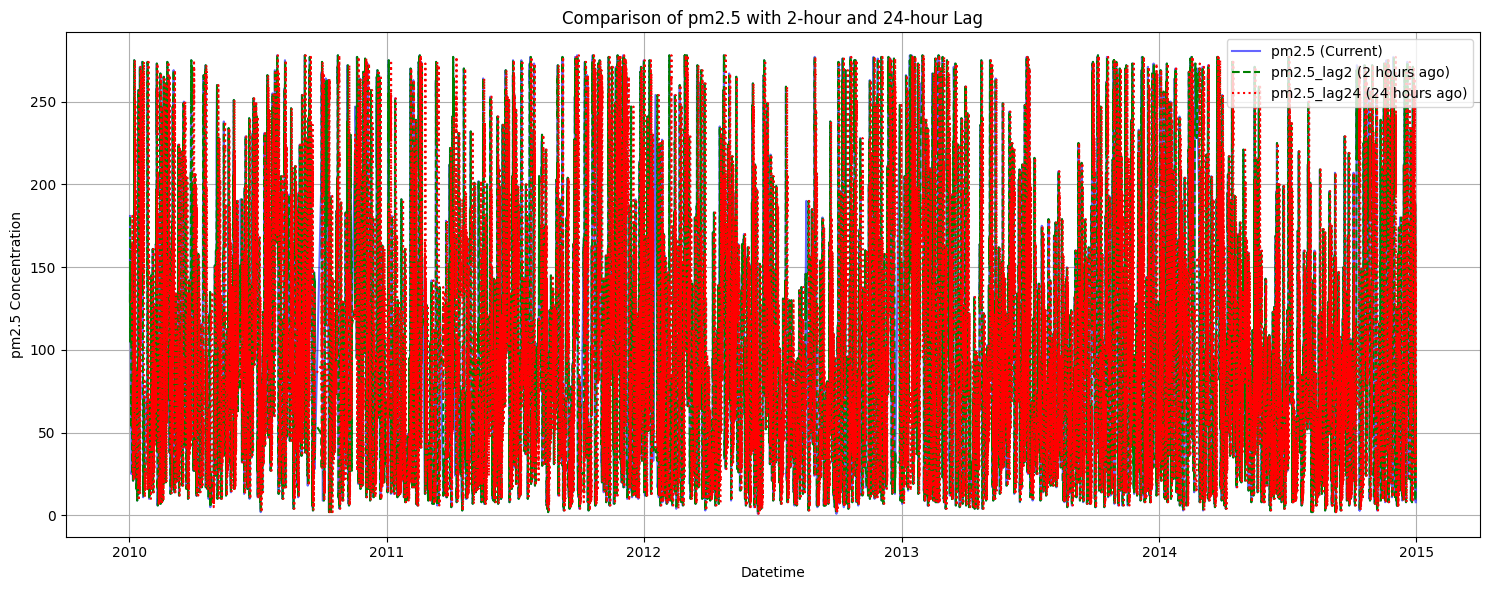

In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)



plt.figure(figsize=(15, 6))

plt.plot(df.index, df['pm2.5'], label='pm2.5 (Current)', color='blue', alpha=0.6)
plt.plot(df.index, df['pm2.5_lag2'], label='pm2.5_lag2 (2 hours ago)', color='green', linestyle='--')
plt.plot(df.index, df['pm2.5_lag24'], label='pm2.5_lag24 (24 hours ago)', color='red', linestyle=':')

plt.xlabel('Datetime')
plt.ylabel('pm2.5 Concentration')
plt.title('Comparison of pm2.5 with 2-hour and 24-hour Lag')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plotting corrolation matrix

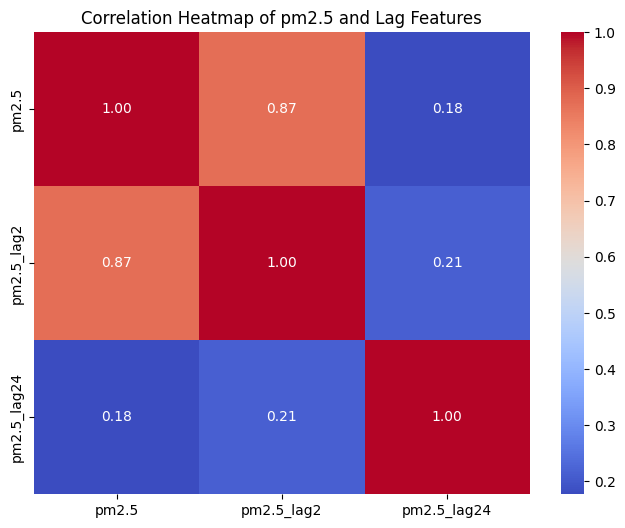

                pm2.5  pm2.5_lag2  pm2.5_lag24
pm2.5        1.000000    0.871432     0.177128
pm2.5_lag2   0.871432    1.000000     0.212819
pm2.5_lag24  0.177128    0.212819     1.000000


In [ ]:
corr_matrix = df[['pm2.5', 'pm2.5_lag2', 'pm2.5_lag24']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of pm2.5 and Lag Features')
plt.show()

print(corr_matrix)

Creating rooling_mean, rolling_var and rolling_std

In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

df['pm2.5_rolling_mean24'] = df['pm2.5'].rolling(window=24).mean()
df['pm2.5_rolling_var24'] = df['pm2.5'].rolling(window=24).var()
df['pm2.5_rolling_std24'] = df['pm2.5'].rolling(window=24).std()

df['pm2.5_rolling_mean24'] = df['pm2.5_rolling_mean24'].fillna(method='bfill')
df['pm2.5_rolling_var24'] = df['pm2.5_rolling_var24'].fillna(method='bfill')
df['pm2.5_rolling_std24'] = df['pm2.5_rolling_std24'].fillna(method='bfill')

<ipython-input-45-b7e5584b0645>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['pm2.5_rolling_mean24'] = df['pm2.5_rolling_mean24'].fillna(method='bfill')
<ipython-input-45-b7e5584b0645>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['pm2.5_rolling_var24'] = df['pm2.5_rolling_var24'].fillna(method='bfill')
<ipython-input-45-b7e5584b0645>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['pm2.5_rolling_std24'] = df['pm2.5_rolling_std24'].fillna(method='bfill')


plotting rolling_mean, rolling_var and rolling_std

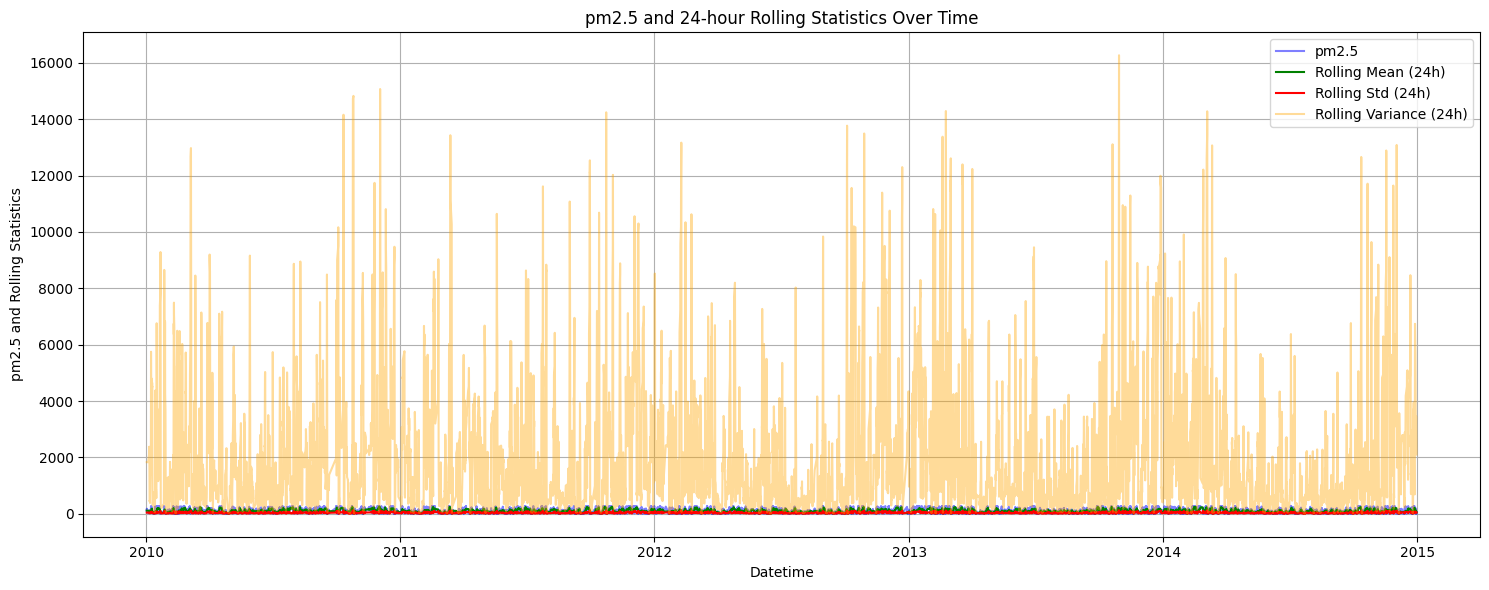

In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

plt.figure(figsize=(15, 6))

plt.plot(df.index, df['pm2.5'], label='pm2.5', color='blue', alpha=0.5)

plt.plot(df.index, df['pm2.5_rolling_mean24'], label='Rolling Mean (24h)', color='green')

plt.plot(df.index, df['pm2.5_rolling_std24'], label='Rolling Std (24h)', color='red')

plt.plot(df.index, df['pm2.5_rolling_var24'], label='Rolling Variance (24h)', color='orange', alpha=0.4)

plt.xlabel('Datetime')
plt.ylabel('pm2.5 and Rolling Statistics')
plt.title('pm2.5 and 24-hour Rolling Statistics Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Encoding periodic features

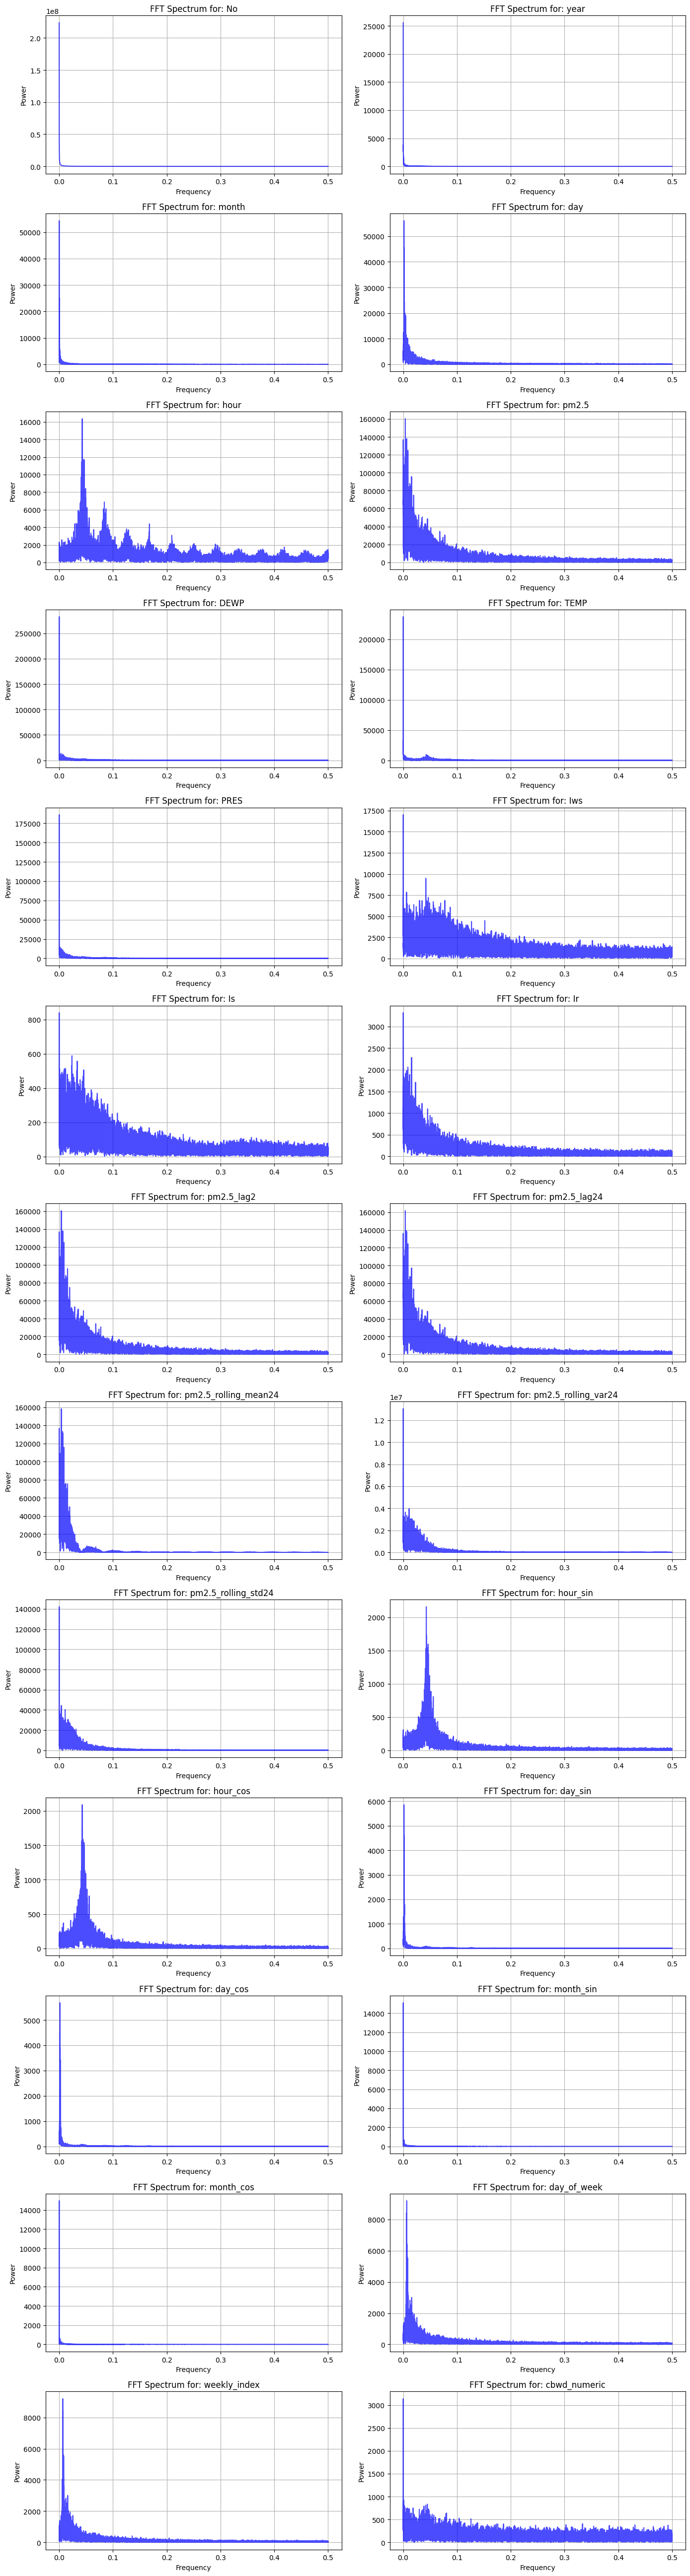

In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

numeric_cols = df.select_dtypes(include=[np.number]).columns

num_cols = len(numeric_cols)

n_cols = 2
n_rows = (num_cols + 1) // n_cols

plt.figure(figsize=(14, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    series = df[col].dropna()


    fft_vals = np.fft.fft(series)
    freqs = np.fft.fftfreq(len(fft_vals))


    pos_mask = freqs > 0
    fft_power = np.abs(fft_vals)[pos_mask]
    fft_freqs = freqs[pos_mask]

    plt.subplot(n_rows, n_cols, i)
    plt.plot(fft_freqs, fft_power, color='blue', alpha=0.7)
    plt.title(f'FFT Spectrum for: {col}')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.grid(True)

plt.tight_layout()
plt.show()

Encoding with sin and cos

In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

print(df[['hour', 'hour_sin', 'hour_cos', 'day', 'day_sin', 'day_cos', 'month', 'month_sin', 'month_cos']].head(10))

                     hour  hour_sin      hour_cos  day   day_sin   day_cos  \
datetime                                                                     
2010-01-02 00:00:00     0  0.000000  1.000000e+00    2  0.394356  0.918958   
2010-01-02 01:00:00     1  0.258819  9.659258e-01    2  0.394356  0.918958   
2010-01-02 02:00:00     2  0.500000  8.660254e-01    2  0.394356  0.918958   
2010-01-02 03:00:00     3  0.707107  7.071068e-01    2  0.394356  0.918958   
2010-01-02 04:00:00     4  0.866025  5.000000e-01    2  0.394356  0.918958   
2010-01-02 05:00:00     5  0.965926  2.588190e-01    2  0.394356  0.918958   
2010-01-02 06:00:00     6  1.000000  6.123234e-17    2  0.394356  0.918958   
2010-01-02 07:00:00     7  0.965926 -2.588190e-01    2  0.394356  0.918958   
2010-01-02 08:00:00     8  0.866025 -5.000000e-01    2  0.394356  0.918958   
2010-01-02 09:00:00     9  0.707107 -7.071068e-01    2  0.394356  0.918958   

                     month  month_sin  month_cos  
datetime    

Plotting scatter

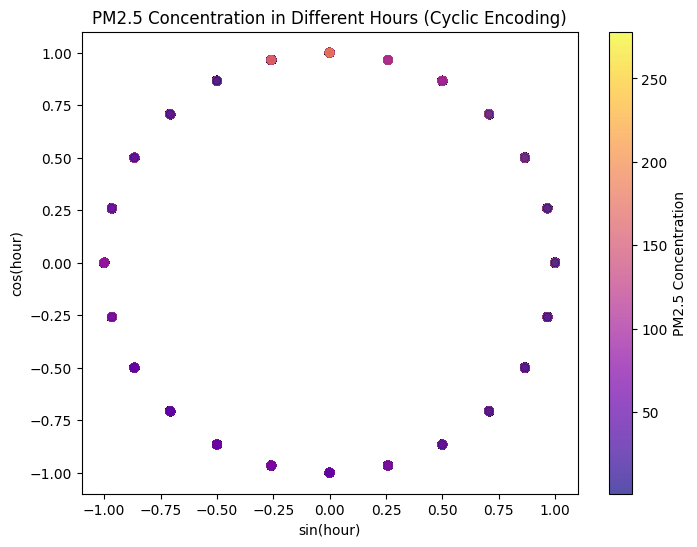

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['hour_sin'], df['hour_cos'], c=df['pm2.5'], cmap='plasma', alpha=0.7)
plt.colorbar(label='PM2.5 Concentration')
plt.xlabel('sin(hour)')
plt.ylabel('cos(hour)')
plt.title('PM2.5 Concentration in Different Hours (Cyclic Encoding)')
plt.show()

Adding season index

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES  \
datetime                                                                     
2010-01-02 00:00:00  25  2010      1    2     0  129.0   -16  -4.0  1020.0   
2010-01-02 01:00:00  26  2010      1    2     1  148.0   -15  -4.0  1020.0   
2010-01-02 02:00:00  27  2010      1    2     2  159.0   -11  -5.0  1021.0   
2010-01-02 03:00:00  28  2010      1    2     3  181.0    -7  -5.0  1022.0   
2010-01-02 04:00:00  29  2010      1    2     4  138.0    -7  -5.0  1022.0   

                    cbwd  ...  hour_sin  hour_cos   day_sin   day_cos  \
datetime                  ...                                           
2010-01-02 00:00:00   SE  ...  0.000000  1.000000  0.394356  0.918958   
2010-01-02 01:00:00   SE  ...  0.258819  0.965926  0.394356  0.918958   
2010-01-02 02:00:00   SE  ...  0.500000  0.866025  0.394356  0.918958   
2010-01-02 03:00:00   SE  ...  0.707107  0.707107  0.394356  0.918958   
2010-01-02 04:00:00   SE  ...  0.866025  0.500000  0.394356  0.918958   

                     month_sin  month_cos  season  day_of_week  weekly_index  \
datetime                                                                       
2010-01-02 00:00:00        0.5   0.866025  Winter            5             5   
2010-01-02 01:00:00        0.5   0.866025  Winter            5             5   
2010-01-02 02:00:00        0.5   0.866025  Winter            5             5   
2010-01-02 03:00:00        0.5   0.866025  Winter            5             5   
2010-01-02 04:00:00        0.5   0.866025  Winter            5             5   

                     cbwd_numeric  
datetime                           
2010-01-02 00:00:00             2  
2010-01-02 01:00:00             2  
2010-01-02 02:00:00             2  
2010-01-02 03:00:00             2  
2010-01-02 04:00:00             2  

[5 rows x 29 columns]

pim2.5 means

In [ ]:
season_avg = df.groupby('season')['pm2.5'].mean()
print(season_avg)

season
Autumn    93.372257
Spring    90.320297
Summer    86.928610
Winter    95.644375
Name: pm2.5, dtype: float64


weekly_index
0    88.889385
1    91.249287
2    88.717101
3    90.739130
4    94.762064
5    95.335839
6    88.983112
Name: pm2.5, dtype: float64


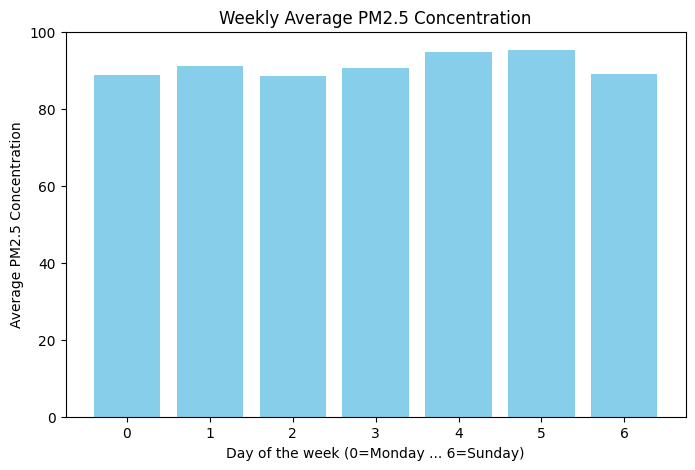

In [ ]:
df = df.reset_index()

df['day_of_week'] = df['datetime'].dt.dayofweek
df['weekly_index'] = df['day_of_week']

weekly_avg = df.groupby('weekly_index')['pm2.5'].mean()
print(weekly_avg)

plt.figure(figsize=(8, 5))
plt.bar(weekly_avg.index, weekly_avg.values, color='skyblue')
plt.xlabel('Day of the week (0=Monday ... 6=Sunday)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Weekly Average PM2.5 Concentration')
plt.show()


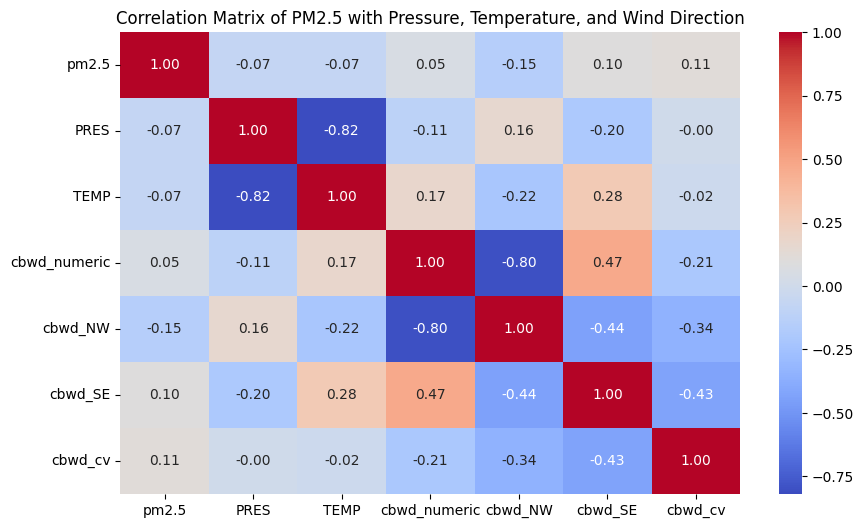

In [ ]:
df_encoded = pd.get_dummies(df, columns=['cbwd'], drop_first=True)

cols_of_interest = ['pm2.5', 'PRES', 'TEMP'] + [col for col in df_encoded.columns if col.startswith('cbwd_')]
df_corr = df_encoded[cols_of_interest]

corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of PM2.5 with Pressure, Temperature, and Wind Direction')
plt.show()

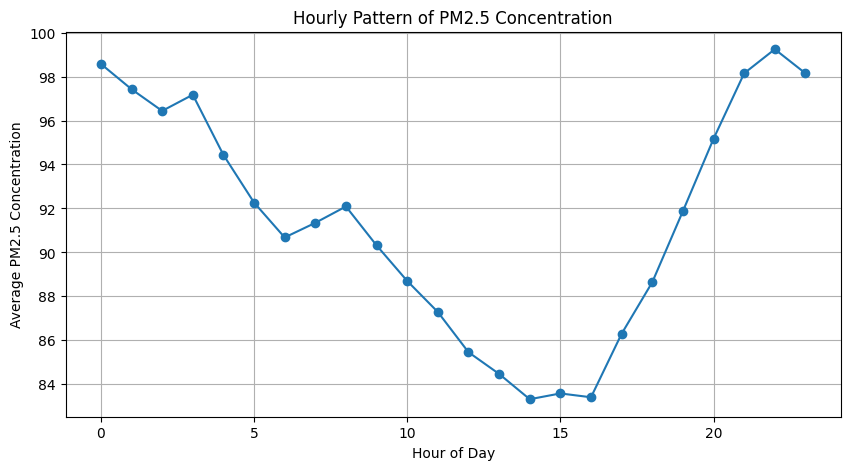

In [ ]:
hourly_avg = df.groupby('hour')['pm2.5'].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Hourly Pattern of PM2.5 Concentration')
plt.grid(True)
plt.show()

Plotting pim2.5

1.2.8

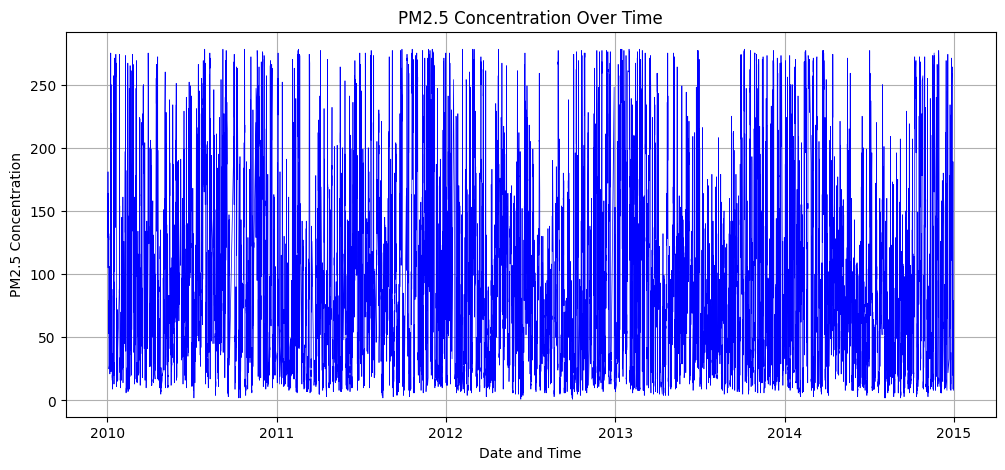

In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
plt.figure(figsize=(12, 5))
plt.plot(df['datetime'], df['pm2.5'], color='blue', linewidth=0.5)
plt.xlabel('Date and Time')
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Concentration Over Time')
plt.grid(True)
plt.show()

pim2.5 max

In [ ]:
max_pm25 = df['pm2.5'].max()
max_date = df.loc[df['pm2.5'].idxmax(), 'datetime']

print(f"Maximum PM2.5: {max_pm25}")
print(f"Date of Maximum PM2.5: {max_date}")

Maximum PM2.5: 278.0
Date of Maximum PM2.5: 2010-07-29 18:00:00


In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

december_mean = df[df['month'] == 12]['pm2.5'].mean()

january_mean = df[df['month'] == 1]['pm2.5'].mean()

print(f"Average PM2.5 in December: {december_mean:.2f}")
print(f"Average PM2.5 in January: {january_mean:.2f}")

Average PM2.5 in December: 96.21
Average PM2.5 in January: 92.28


1.2.9

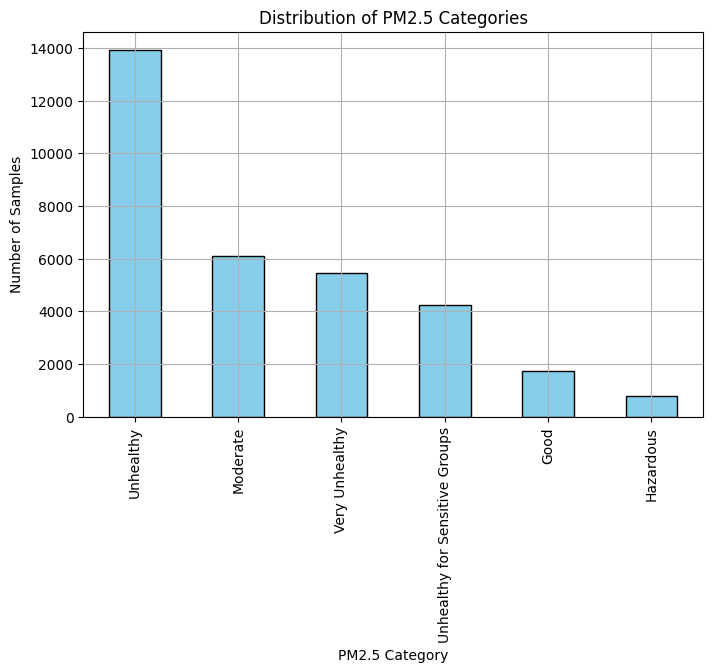

pm2.5_category
Unhealthy                         13921
Moderate                           6089
Very Unhealthy                     5448
Unhealthy for Sensitive Groups     4251
Good                               1727
Hazardous                           768
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 5))
df['pm2.5_category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('PM2.5 Category')
plt.ylabel('Number of Samples')
plt.title('Distribution of PM2.5 Categories')
plt.grid(True)
plt.show()
print(df['pm2.5_category'].value_counts())

In [ ]:
print(df.columns)

Index(['datetime', 'No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP',
       'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'pm2.5_category',
       'pm2.5_lag2', 'pm2.5_lag24', 'pm2.5_rolling_mean24',
       'pm2.5_rolling_var24', 'pm2.5_rolling_std24', 'hour_sin', 'hour_cos',
       'day_sin', 'day_cos', 'month_sin', 'month_cos', 'season', 'day_of_week',
       'weekly_index'],
      dtype='object')


ballancing

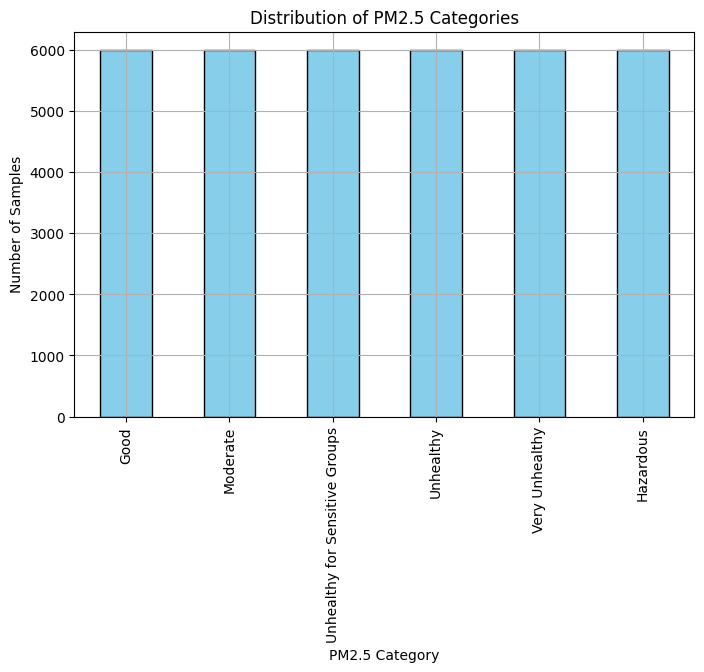

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

features = [
    'pm2.5_category', 'year','TEMP', 'PRES', 'DEWP',
    'hour', 'month', 'day_of_week',
    'hour_sin', 'hour_cos',
    'month_sin', 'month_cos',
    'day_sin', 'day_cos','Iws', 'Is', 'Ir', 'cbwd_numeric','pm2.5_lag2', 'pm2.5_lag24', 'pm2.5_rolling_mean24',
       'pm2.5_rolling_var24', 'pm2.5_rolling_std24','weekly_index'
]


df_model = df[features]


X = df_model.drop(columns='pm2.5_category')
y = df_model['pm2.5_category']
'''
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

'''
target_under = {cls: 2000 if count > 6000 else count for cls, count in Counter(y).items()}
rus = RandomUnderSampler(sampling_strategy=target_under, random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)


target_over = {cls: 6000 for cls, count in Counter(y_rus).items() if count < 6000}
smote = SMOTE(sampling_strategy=target_over, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_rus, y_rus)

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

plt.figure(figsize=(8, 5))
df_balanced['pm2.5_category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('PM2.5 Category')
plt.ylabel('Number of Samples')
plt.title('Distribution of PM2.5 Categories')
plt.grid(True)
plt.show()


In [ ]:
print(df_balanced.columns)

Index(['year', 'TEMP', 'PRES', 'DEWP', 'hour', 'month', 'day_of_week',
       'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'Iws', 'Is', 'Ir', 'cbwd_numeric', 'pm2.5_lag2', 'pm2.5_lag24',
       'pm2.5_rolling_mean24', 'pm2.5_rolling_var24', 'pm2.5_rolling_std24',
       'weekly_index', 'pm2.5_category'],
      dtype='object')


1.2.10

Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features = [
    'year','TEMP', 'PRES', 'DEWP',
    'hour', 'month', 'day_of_week',
    'hour_sin', 'hour_cos',
    'month_sin', 'month_cos',
    'day_sin', 'day_cos','Iws', 'Is', 'Ir', 'cbwd_numeric','pm2.5_lag2', 'pm2.5_lag24', 'pm2.5_rolling_mean24',
       'pm2.5_rolling_var24', 'pm2.5_rolling_std24','weekly_index'
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_balanced[numeric_features])

df_normalized = pd.DataFrame(X_scaled, columns=numeric_features)

df_normalized['pm2.5_category'] = df_balanced['pm2.5_category'].values

1.2.11 Train, Test validation split

In [ ]:
X = df_normalized.drop(columns='pm2.5_category')
y = df_normalized['pm2.5_category']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=16, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=16, stratify=y_temp
)


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)

1.2.12

SVM-Linear

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

svm_linear = SVC(
    kernel='linear',
    C=1,              #  0.1, 1, 10, 100
    shrinking=True,
    tol=1e-3,
    probability=True
)

svm_linear.fit(X_train, y_train)

y_train_pred = svm_linear.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.3f}")

Train Accuracy: 0.707


In [ ]:
y_val_pred = svm_linear.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Val Accuracy: {val_accuracy:.3f}")

Val Accuracy: 0.705


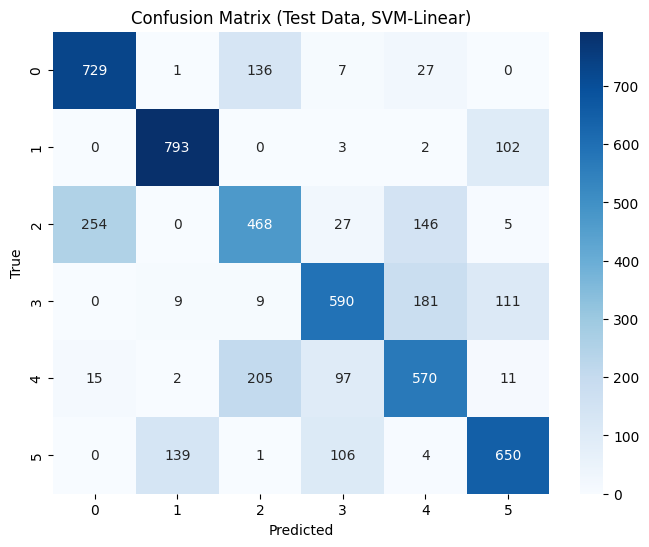


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       900
           1       0.84      0.88      0.86       900
           2       0.57      0.52      0.54       900
           3       0.71      0.66      0.68       900
           4       0.61      0.63      0.62       900
           5       0.74      0.72      0.73       900

    accuracy                           0.70      5400
   macro avg       0.70      0.70      0.70      5400
weighted avg       0.70      0.70      0.70      5400

Test Accuracy: 0.704


In [ ]:
y_test_pred = svm_linear.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data, SVM-Linear)')
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

SVM_rbf

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

svm_rbf = SVC(
    kernel='rbf',
    C=2,              #  0.1, 1, 10, 100
    gamma='scale',
    shrinking=True,
    tol=1e-3,
    probability=True
)

svm_rbf.fit(X_train, y_train)

y_train_pred = svm_rbf.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.3f}")

Train Accuracy: 0.841


In [ ]:
y_val_pred = svm_rbf.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Val Accuracy: {val_accuracy:.3f}")

Val Accuracy: 0.791


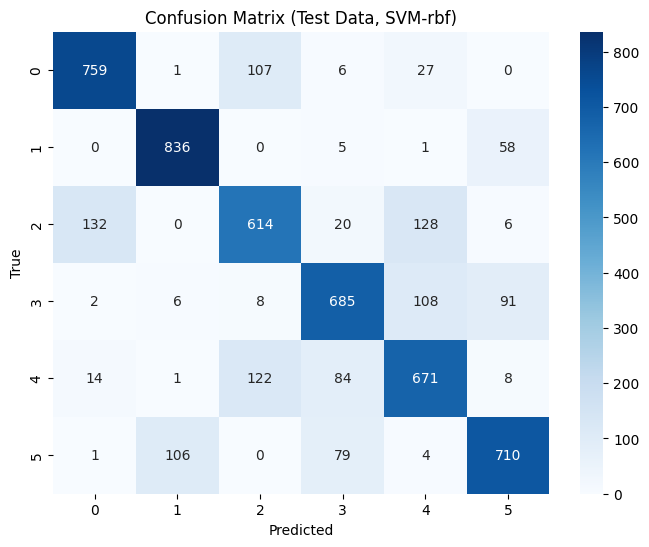


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       900
           1       0.88      0.93      0.90       900
           2       0.72      0.68      0.70       900
           3       0.78      0.76      0.77       900
           4       0.71      0.75      0.73       900
           5       0.81      0.79      0.80       900

    accuracy                           0.79      5400
   macro avg       0.79      0.79      0.79      5400
weighted avg       0.79      0.79      0.79      5400

Test Accuracy: 0.792


In [ ]:
y_test_pred = svm_rbf.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data, SVM-rbf)')
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

SVM_polynominal

In [ ]:
svm_poly = SVC(
    kernel='poly',
    C=1.0,
    degree=3,
    gamma='scale',
    shrinking=True,
    tol=1e-3,
    probability=True
)

svm_poly.fit(X_train, y_train)

y_train_pred = svm_poly.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.3f}")

Train Accuracy: 0.776


In [ ]:
y_val_pred = svm_poly.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Val Accuracy: {val_accuracy:.3f}")

Val Accuracy: 0.732


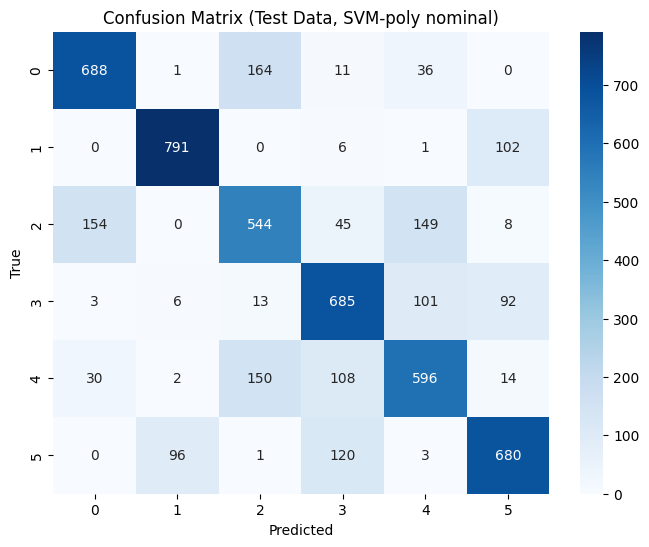


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       900
           1       0.88      0.88      0.88       900
           2       0.62      0.60      0.61       900
           3       0.70      0.76      0.73       900
           4       0.67      0.66      0.67       900
           5       0.76      0.76      0.76       900

    accuracy                           0.74      5400
   macro avg       0.74      0.74      0.74      5400
weighted avg       0.74      0.74      0.74      5400

Test Accuracy: 0.738


In [ ]:
y_test_pred = svm_poly.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data, SVM-poly nominal)')
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

Comparing linear, rbf and polynominal

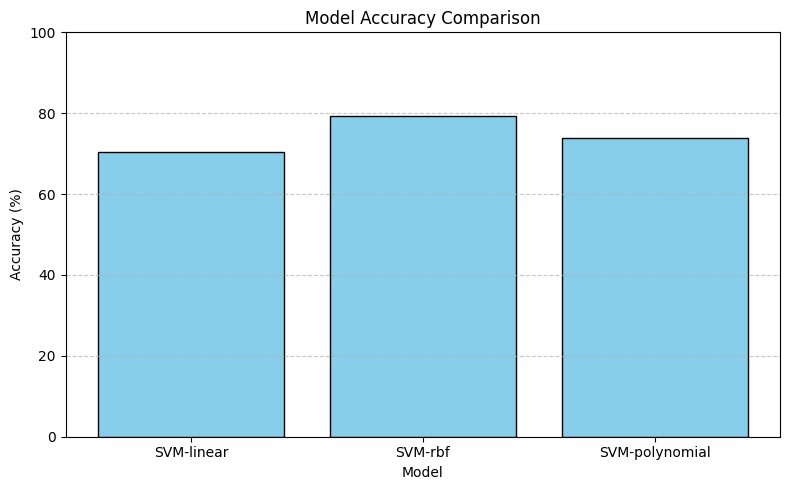

In [ ]:
import matplotlib.pyplot as plt

model_names = ['SVM-linear', 'SVM-rbf', 'SVM-polynomial']
accuracies = [70.4, 79.2, 73.8]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color='skyblue', edgecolor='black')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

SVM from scratch

Reduced data

In [ ]:

num_classes = df_balanced['pm2.5_category'].nunique()


df_reduced = pd.DataFrame()
for label in df_balanced['pm2.5_category'].unique():
    df_class = df_balanced[df_balanced['pm2.5_category'] == label]
    df_sampled = df_class.sample(n=1500, random_state=42)
    df_reduced = pd.concat([df_reduced, df_sampled])


df_reduced.reset_index(drop=True, inplace=True)

print(df_reduced.shape)
print(df_reduced['pm2.5_category'].value_counts())

numeric_features = [
    'year','TEMP', 'PRES', 'DEWP',
    'hour', 'month', 'day_of_week',
    'hour_sin', 'hour_cos',
    'month_sin', 'month_cos',
    'day_sin', 'day_cos','Iws', 'Is', 'Ir', 'cbwd_numeric','pm2.5_lag2', 'pm2.5_lag24', 'pm2.5_rolling_mean24',
       'pm2.5_rolling_var24', 'pm2.5_rolling_std24','weekly_index'
]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced[numeric_features])

df_normalized = pd.DataFrame(X_scaled, columns=numeric_features)

df_normalized['pm2.5_category'] = df_reduced['pm2.5_category'].values

(9000, 24)
pm2.5_category
Good                              1500
Moderate                          1500
Unhealthy for Sensitive Groups    1500
Unhealthy                         1500
Very Unhealthy                    1500
Hazardous                         1500
Name: count, dtype: int64


train and test split

In [ ]:
X = df_normalized.drop(columns='pm2.5_category')
y = df_normalized['pm2.5_category']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=16, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=16, stratify=y_temp
)


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)

In [ ]:
X_train.shape


(6300, 23)

linear svm

In [ ]:
import numpy as np
from cvxopt import matrix, solvers

def linear_kernel(x1, x2):

    return np.dot(x1, x2)

def compute_kernel_matrix(X, kernel_function=linear_kernel):

    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_function(X[i], X[j])
    return K


def train_svm_qp(X, y, C=1.0, kernel_function=linear_kernel):

    n_samples, n_features = X.shape
    K = compute_kernel_matrix(X, kernel_function)


    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))


    G_std = matrix(np.diag(-np.ones(n_samples)))
    h_std = matrix(np.zeros(n_samples))

    G_slack = matrix(np.diag(np.ones(n_samples)))
    h_slack = matrix(np.ones(n_samples) * C)

    G = matrix(np.vstack((G_std, G_slack)))
    h = matrix(np.vstack((h_std, h_slack)))


    A = matrix(y.astype(float), (1, n_samples))
    b = matrix(0.0)

    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    alpha = np.ravel(sol['x'])
    return alpha, K

def compute_w_b_linear_svm(alpha, y, X,C = 1):

    sv = (alpha > 1e-5)
    X_sv = X[sv]
    y_sv = y[sv]
    alpha_sv = alpha[sv]


    w = np.sum(alpha_sv[:, None] * y_sv[:, None] * X_sv, axis=0)

    margin_sv_indices = (alpha_sv < (C - 1e-5)) & (alpha_sv > 1e-5)

    if np.any(margin_sv_indices):
        b_candidates = y_sv[margin_sv_indices] - np.dot(X_sv[margin_sv_indices], w)
        b = np.mean(b_candidates)
    else:

        b_candidates = y_sv - np.dot(X_sv, w)
        b = np.mean(b_candidates)

    return w, b

def predict_linear_svm(X_test, w, b):

    return np.sign(np.dot(X_test, w) + b)

def predict_kernel_svm(X_test, X_train, y_train, alpha, b, kernel_function):

    sv = (alpha > 1e-5)
    alpha_sv = alpha[sv]
    y_sv = y_train[sv]
    X_sv = X_train[sv]

    n_test_samples = X_test.shape[0]
    predictions = np.zeros(n_test_samples)

    for i in range(n_test_samples):
        s = 0
        for j in range(len(alpha_sv)):
            s += alpha_sv[j] * y_sv[j] * kernel_function(X_test[i], X_sv[j])
        predictions[i] = s + b
    return np.sign(predictions)

def one_vs_rest_train(X, y, C=1.0, kernel_function=linear_kernel):

    models = []
    classes = np.unique(y)
    for c in classes:

        y_binary = np.where(y == c, 1, -1)

        alpha, K = train_svm_qp(X, y_binary, C=C, kernel_function=kernel_function)

        sv = (alpha > 1e-5)
        alpha_sv = alpha[sv]
        y_sv = y_binary[sv]
        X_sv = X[sv]

        b_candidates = []

        margin_sv_indices = (alpha_sv < (C - 1e-5)) & (alpha_sv > 1e-5)

        if np.any(margin_sv_indices):
            for idx in np.where(margin_sv_indices)[0]:
                val = 0
                for j in range(len(alpha_sv)):
                    val += alpha_sv[j] * y_sv[j] * kernel_function(X_sv[j], X_sv[idx])
                b_candidates.append(y_sv[idx] - val)
            b = np.mean(b_candidates)
        elif np.any(sv):
            for idx in range(len(X_sv)):
                val = 0
                for j in range(len(alpha_sv)):
                    val += alpha_sv[j] * y_sv[j] * kernel_function(X_sv[j], X_sv[idx])
                b_candidates.append(y_sv[idx] - val)
            b = np.mean(b_candidates)
        else:
            b = 0.0

        model_info = {'class': c, 'alpha': alpha, 'b': b, 'X_train': X, 'y_binary': y_binary, 'kernel_function': kernel_function}


        if kernel_function == linear_kernel:
            w, _ = compute_w_b_linear_svm(alpha, y_binary, X)
            model_info['w'] = w

        models.append(model_info)
    return models

def one_vs_rest_predict(models, X_test):

    preds_scores = []
    for model in models:

        if model['kernel_function'] == linear_kernel:

            s = np.dot(X_test, model['w']) + model['b']
        else:

            s = []
            for i in range(X_test.shape[0]):
                score_i = 0

                alpha_sv = model['alpha'][(model['alpha'] > 1e-5)]
                y_sv = model['y_binary'][(model['alpha'] > 1e-5)]
                X_sv = model['X_train'][(model['alpha'] > 1e-5)]

                for j in range(len(alpha_sv)):
                    score_i += alpha_sv[j] * y_sv[j] * model['kernel_function'](X_test[i], X_sv[j])
                s.append(score_i + model['b'])
            s = np.array(s)

        preds_scores.append(s)

    preds_scores = np.array(preds_scores)

    predicted_class_indices = np.argmax(preds_scores, axis=0)

    classes_map = [model['class'] for model in models]
    final_predictions = np.array([classes_map[idx] for idx in predicted_class_indices])

    return final_predictions

In [ ]:
X_train = X_train.values
models = one_vs_rest_train(X_train, y_train)

y_pred = one_vs_rest_predict(models, X_train)

accuracy = np.mean(y_pred == y_train)
print(f"Accuracy on training data: {accuracy * 100:.2f}%")

Accuracy on training data: 48.27%


In [ ]:

y_val_pred = one_vs_rest_predict(models,X_val)

accuracy = np.mean(y_pred == y_val)
print(f"Accuracy on training data: {accuracy * 100:.2f}%")

Accuracy on training data: 48.27%


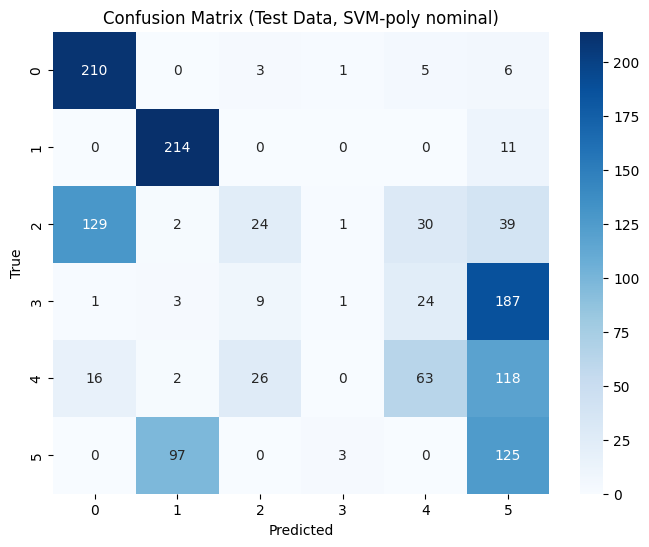


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.59      0.93      0.72       225
           1       0.67      0.95      0.79       225
           2       0.39      0.11      0.17       225
           3       0.17      0.00      0.01       225
           4       0.52      0.28      0.36       225
           5       0.26      0.56      0.35       225

    accuracy                           0.47      1350
   macro avg       0.43      0.47      0.40      1350
weighted avg       0.43      0.47      0.40      1350

Test Accuracy: 0.472


In [ ]:

y_test_pred = one_vs_rest_predict(models,X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data, SVM-poly nominal)')
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

SVM_rbf form scratch

In [ ]:
import numpy as np
from cvxopt import matrix, solvers

def rbf_kernel(x1, x2, gamma=1.0):


    squared_distance = np.sum((x1 - x2)**2)

    return np.exp(-gamma * squared_distance)

def compute_kernel_matrix(X, kernel_function, **kernel_params):

    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_function(X[i], X[j], **kernel_params)
    return K

def train_svm_qp(X, y, C=1.0, kernel_function=rbf_kernel, **kernel_params):

    n_samples, n_features = X.shape


    K = compute_kernel_matrix(X, kernel_function, **kernel_params)


    P = matrix(np.outer(y, y) * K)

    q = matrix(-np.ones(n_samples))


    G_std = matrix(np.diag(-np.ones(n_samples)))
    h_std = matrix(np.zeros(n_samples))


    G_slack = matrix(np.diag(np.ones(n_samples)))
    h_slack = matrix(np.ones(n_samples) * C)

    G = matrix(np.vstack((G_std, G_slack)))
    h = matrix(np.vstack((h_std, h_slack)))


    A = matrix(y.astype(float), (1, n_samples))
    b = matrix(0.0)


    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)


    alpha = np.ravel(sol['x'])
    return alpha, K

def compute_b_kernel_svm(alpha, y, X, K, C=1.0, kernel_function=rbf_kernel, **kernel_params):

    sv_indices = (alpha > 1e-5).flatten()

    alpha_sv = alpha[sv_indices]
    y_sv = y[sv_indices]
    X_sv = X[sv_indices]

    margin_sv_indices = (alpha_sv < (C - 1e-5)) & (alpha_sv > 1e-5)

    b_candidates = []

    if np.any(margin_sv_indices):

        for idx in np.where(margin_sv_indices)[0]:

            val = 0
            for j in range(len(alpha_sv)):
                val += alpha_sv[j] * y_sv[j] * kernel_function(X_sv[j], X_sv[idx], **kernel_params)
            b_candidates.append(y_sv[idx] - val)
        b = np.mean(b_candidates)
    elif np.any(sv_indices):

        for idx in range(len(X_sv)):
            val = 0
            for j in range(len(alpha_sv)):
                val += alpha_sv[j] * y_sv[j] * kernel_function(X_sv[j], X_sv[idx], **kernel_params)
            b_candidates.append(y_sv[idx] - val)
        b = np.mean(b_candidates)
    else:

        b = 0.0
        print("Warning: No support vectors found. Bias 'b' set to 0.0.")

    return b

def predict_kernel_svm(X_test, X_train, y_train, alpha, b, kernel_function, **kernel_params):


    sv = (alpha > 1e-5).flatten()
    alpha_sv = alpha[sv]
    y_sv = y_train[sv]
    X_sv = X_train[sv]

    n_test_samples = X_test.shape[0]
    predictions = np.zeros(n_test_samples)


    for i in range(n_test_samples):
        s = 0
        for j in range(len(alpha_sv)):

            s += alpha_sv[j] * y_sv[j] * kernel_function(X_test[i], X_sv[j], **kernel_params)
        predictions[i] = s + b
    return np.sign(predictions)


def one_vs_rest_train(X, y, C=1.0, kernel_function=rbf_kernel, **kernel_params):

    models = []
    classes = np.unique(y)

    for c in classes:

        y_binary = np.where(y == c, 1, -1)

        alpha, K = train_svm_qp(X, y_binary, C=C, kernel_function=kernel_function, **kernel_params)


        b = compute_b_kernel_svm(alpha, y_binary, X, K, C, kernel_function, **kernel_params)

        model_info = {
            'class': c,
            'alpha': alpha,
            'b': b,
            'X_train': X,
            'y_binary': y_binary,
            'kernel_function': kernel_function,
            'kernel_params': kernel_params
        }
        models.append(model_info)
    return models

def one_vs_rest_predict(models, X_test):

    preds_scores = []
    for model in models:
        s = []

        sv = (model['alpha'] > 1e-5).flatten()
        alpha_sv = model['alpha'][sv]
        y_sv = model['y_binary'][sv]
        X_sv = model['X_train'][sv]


        kernel_function = model['kernel_function']
        kernel_params = model['kernel_params']

        for i in range(X_test.shape[0]):
            score_i = 0
            for j in range(len(alpha_sv)):
                score_i += alpha_sv[j] * y_sv[j] * kernel_function(X_test[i], X_sv[j], **kernel_params)
            s.append(score_i + model['b'])
        preds_scores.append(np.array(s))

    preds_scores = np.array(preds_scores)


    predicted_class_indices = np.argmax(preds_scores, axis=0)


    classes_map = [model['class'] for model in models]
    final_predictions = np.array([classes_map[idx] for idx in predicted_class_indices])

    return final_predictions


In [ ]:

models = one_vs_rest_train(X_train, y_train)

y_pred = one_vs_rest_predict(models, X_train)

accuracy = np.mean(y_pred == y_train)
print(f"Accuracy on training data: {accuracy * 100:.2f}%")

Accuracy on training data: 48.27%


In [ ]:

y_val_pred = one_vs_rest_predict(models,X_val)

accuracy = np.mean(y_val_pred == y_val)
print(f"Accuracy on training data: {accuracy * 100:.2f}%")

Accuracy on training data: 49.48%


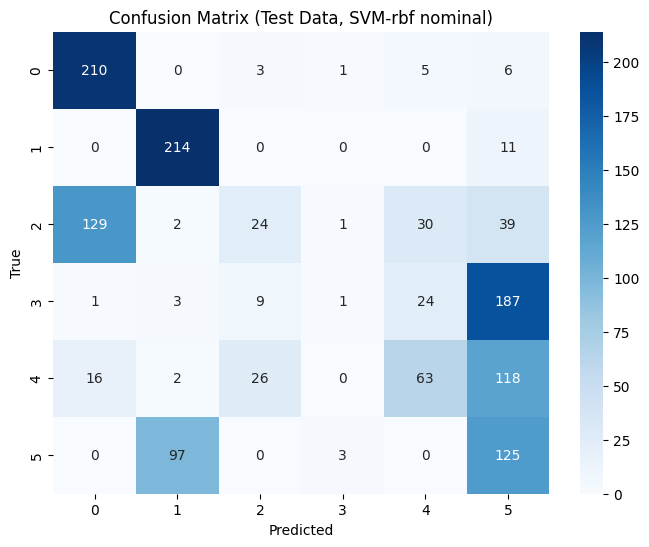


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.59      0.93      0.72       225
           1       0.67      0.95      0.79       225
           2       0.39      0.11      0.17       225
           3       0.17      0.00      0.01       225
           4       0.52      0.28      0.36       225
           5       0.26      0.56      0.35       225

    accuracy                           0.47      1350
   macro avg       0.43      0.47      0.40      1350
weighted avg       0.43      0.47      0.40      1350

Test Accuracy: 0.472


In [ ]:

y_test_pred = one_vs_rest_predict(models,X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data, SVM-rbf nominal)')
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

SVM polynominal

In [ ]:
import numpy as np
from cvxopt import matrix, solvers

def poly_kernel(x1, x2, degree=2, coef0=1.0):

    dot_product = np.dot(x1, x2)

    return (dot_product + coef0)**degree

def compute_kernel_matrix(X, kernel_function, **kernel_params):

    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_function(X[i], X[j], **kernel_params)
    return K

def train_svm_qp(X, y, C=1.0, kernel_function=poly_kernel, **kernel_params):

    n_samples, n_features = X.shape

    K = compute_kernel_matrix(X, kernel_function, **kernel_params)

    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))


    G_std = matrix(np.diag(-np.ones(n_samples)))
    h_std = matrix(np.zeros(n_samples))


    G_slack = matrix(np.diag(np.ones(n_samples)))
    h_slack = matrix(np.ones(n_samples) * C)

    G = matrix(np.vstack((G_std, G_slack)))
    h = matrix(np.vstack((h_std, h_slack)))


    A = matrix(y.astype(float), (1, n_samples))
    b = matrix(0.0)


    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)


    alpha = np.ravel(sol['x'])
    return alpha, K

def compute_b_kernel_svm(alpha, y, X, K, C=1.0, kernel_function=poly_kernel, **kernel_params):

    sv_indices = (alpha > 1e-5).flatten()

    alpha_sv = alpha[sv_indices]
    y_sv = y[sv_indices]
    X_sv = X[sv_indices]


    margin_sv_indices = (alpha_sv < (C - 1e-5)) & (alpha_sv > 1e-5)

    b_candidates = []

    if np.any(margin_sv_indices):

        for idx in np.where(margin_sv_indices)[0]:

            val = 0
            for j in range(len(alpha_sv)):
                val += alpha_sv[j] * y_sv[j] * kernel_function(X_sv[j], X_sv[idx], **kernel_params)
            b_candidates.append(y_sv[idx] - val)
        b = np.mean(b_candidates)
    elif np.any(sv_indices):

        for idx in range(len(X_sv)):
            val = 0
            for j in range(len(alpha_sv)):
                val += alpha_sv[j] * y_sv[j] * kernel_function(X_sv[j], X_sv[idx], **kernel_params)
            b_candidates.append(y_sv[idx] - val)
        b = np.mean(b_candidates)
    else:

        b = 0.0
        print("Warning: No support vectors found. Bias 'b' set to 0.0.")

    return b

def predict_kernel_svm(X_test, X_train, y_train, alpha, b, kernel_function, **kernel_params):


    sv = (alpha > 1e-5).flatten()
    alpha_sv = alpha[sv]
    y_sv = y_train[sv]
    X_sv = X_train[sv]

    n_test_samples = X_test.shape[0]
    predictions = np.zeros(n_test_samples)


    for i in range(n_test_samples):
        s = 0
        for j in range(len(alpha_sv)):

            s += alpha_sv[j] * y_sv[j] * kernel_function(X_test[i], X_sv[j], **kernel_params)
        predictions[i] = s + b
    return np.sign(predictions)

def one_vs_rest_train(X, y, C=1.0, kernel_function=poly_kernel, **kernel_params):

    models = []
    classes = np.unique(y)

    for c in classes:

        y_binary = np.where(y == c, 1, -1)


        alpha, K = train_svm_qp(X, y_binary, C=C, kernel_function=kernel_function, **kernel_params)


        b = compute_b_kernel_svm(alpha, y_binary, X, K, C, kernel_function, **kernel_params)

        model_info = {
            'class': c,
            'alpha': alpha,
            'b': b,
            'X_train': X,
            'y_binary': y_binary,
            'kernel_function': kernel_function,
            'kernel_params': kernel_params
        }
        models.append(model_info)
    return models

def one_vs_rest_predict(models, X_test):

    preds_scores = []
    for model in models:
        s = []

        sv = (model['alpha'] > 1e-5).flatten()
        alpha_sv = model['alpha'][sv]
        y_sv = model['y_binary'][sv]
        X_sv = model['X_train'][sv]


        kernel_function = model['kernel_function']
        kernel_params = model['kernel_params']


        for i in range(X_test.shape[0]):
            score_i = 0
            for j in range(len(alpha_sv)):

                score_i += alpha_sv[j] * y_sv[j] * kernel_function(X_test[i], X_sv[j], **kernel_params)
            s.append(score_i + model['b'])
        preds_scores.append(np.array(s))

    preds_scores = np.array(preds_scores)


    predicted_class_indices = np.argmax(preds_scores, axis=0)


    classes_map = [model['class'] for model in models]
    final_predictions = np.array([classes_map[idx] for idx in predicted_class_indices])

    return final_predictions

In [ ]:
X_train = X_train.values
models = one_vs_rest_train(X_train, y_train)

y_pred = one_vs_rest_predict(models, X_train)

accuracy = np.mean(y_pred == y_train)
print(f"Accuracy on training data: {accuracy * 100:.2f}%")

Accuracy on training data: 78.30%


In [ ]:
X_val = X_val.values
y_val_pred = one_vs_rest_predict(models,X_val)

accuracy = np.mean(y_val_pred == y_val)
print(f"Accuracy on training data: {accuracy * 100:.2f}%")

Accuracy on training data: 73.48%


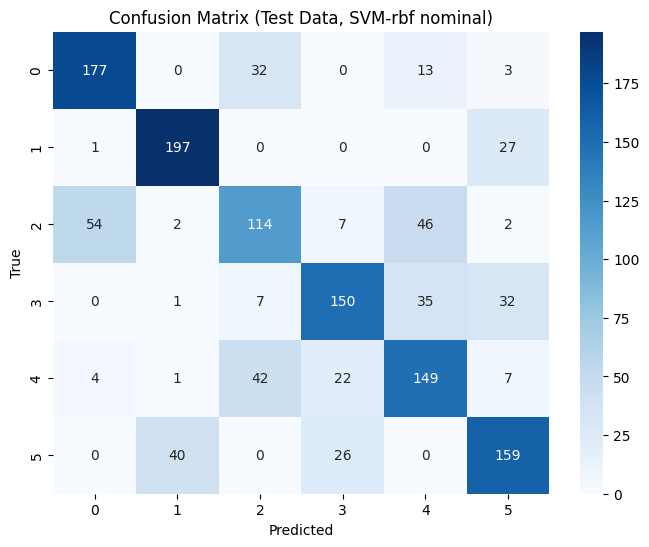


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       225
           1       0.82      0.88      0.85       225
           2       0.58      0.51      0.54       225
           3       0.73      0.67      0.70       225
           4       0.61      0.66      0.64       225
           5       0.69      0.71      0.70       225

    accuracy                           0.70      1350
   macro avg       0.70      0.70      0.70      1350
weighted avg       0.70      0.70      0.70      1350

Test Accuracy: 0.701


In [ ]:
X_test = X_test.values
y_test_pred = one_vs_rest_predict(models,X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data, SVM-rbf nominal)')
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

sklearn for compare

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

svm_linear = SVC(
    kernel='linear',
    C=1,              #  0.1, 1, 10, 100
    shrinking=True,
    tol=1e-3,
    probability=True
)

svm_linear.fit(X_train, y_train)

y_train_pred = svm_linear.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.3f}")

Train Accuracy: 0.703


In [ ]:
y_val_pred = svm_linear.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Val Accuracy: {val_accuracy:.3f}")

Val Accuracy: 0.706


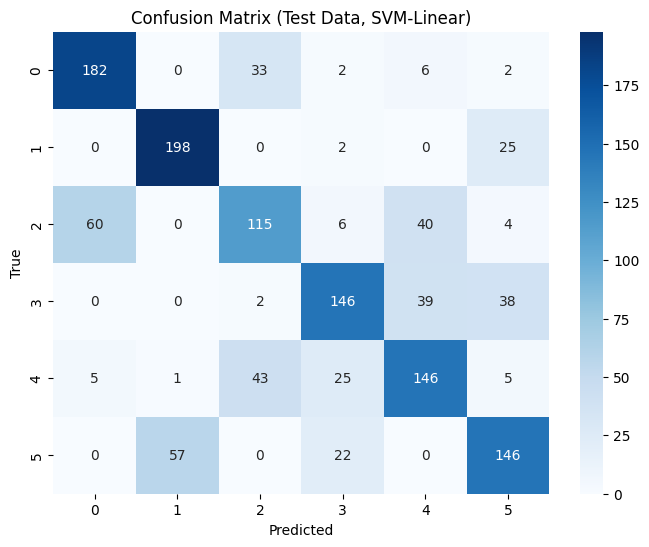


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       225
           1       0.77      0.88      0.82       225
           2       0.60      0.51      0.55       225
           3       0.72      0.65      0.68       225
           4       0.63      0.65      0.64       225
           5       0.66      0.65      0.66       225

    accuracy                           0.69      1350
   macro avg       0.69      0.69      0.69      1350
weighted avg       0.69      0.69      0.69      1350

Test Accuracy: 0.691


In [ ]:
y_test_pred = svm_linear.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data, SVM-Linear)')
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

svm_rbf = SVC(
    kernel='rbf',
    C=1,              #  0.1, 1, 10, 100
    gamma='scale',
    shrinking=True,
    tol=1e-3,
    probability=True
)

svm_rbf.fit(X_train, y_train)

y_train_pred = svm_rbf.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.3f}")

Train Accuracy: 0.786


In [ ]:
y_val_pred = svm_rbf.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Val Accuracy: {val_accuracy:.3f}")

Val Accuracy: 0.743


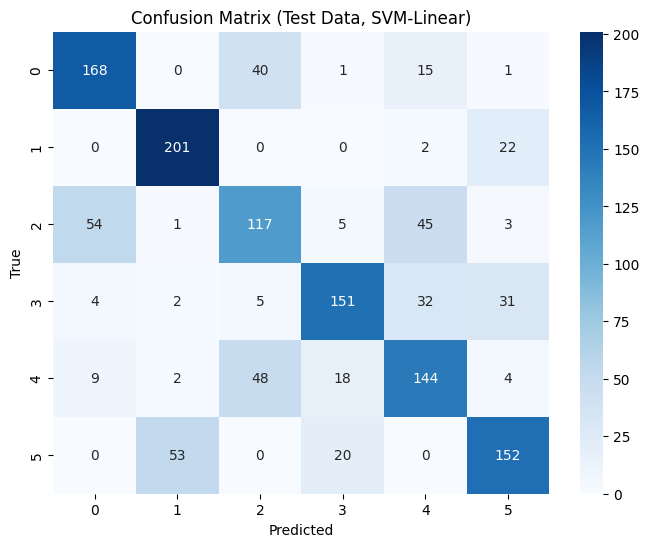


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       225
           1       0.78      0.89      0.83       225
           2       0.56      0.52      0.54       225
           3       0.77      0.67      0.72       225
           4       0.61      0.64      0.62       225
           5       0.71      0.68      0.69       225

    accuracy                           0.69      1350
   macro avg       0.69      0.69      0.69      1350
weighted avg       0.69      0.69      0.69      1350

Test Accuracy: 0.691


In [ ]:
y_test_pred = svm_rbf.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data, SVM-Linear)')
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

In [ ]:
svm_poly = SVC(
    kernel='poly',
    C=1.0,
    degree=2,
    gamma='scale',
    shrinking=True,
    tol=1e-3,
    probability=True
)

svm_poly.fit(X_train, y_train)

y_train_pred = svm_poly.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.3f}")

Train Accuracy: 0.661


In [ ]:
y_val_pred = svm_poly.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Val Accuracy: {val_accuracy:.3f}")

Val Accuracy: 0.620


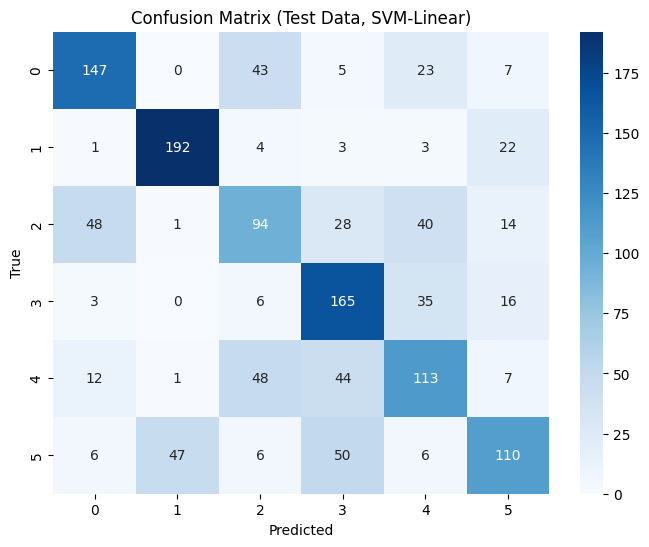


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       225
           1       0.80      0.85      0.82       225
           2       0.47      0.42      0.44       225
           3       0.56      0.73      0.63       225
           4       0.51      0.50      0.51       225
           5       0.62      0.49      0.55       225

    accuracy                           0.61      1350
   macro avg       0.61      0.61      0.60      1350
weighted avg       0.61      0.61      0.60      1350

Test Accuracy: 0.608


In [ ]:
y_test_pred = svm_poly.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data, SVM-Linear)')
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

Comparing

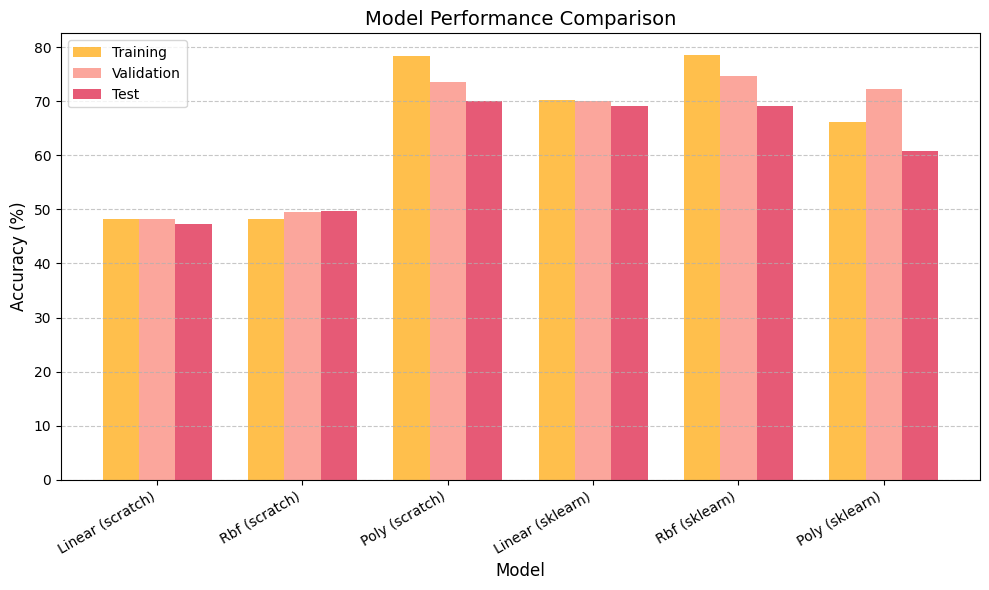

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    "Model": ["Linear (scratch)", "Rbf (scratch)", "Poly (scratch)", "Linear (sklearn)", "Rbf (sklearn)", "Poly (sklearn)"],
    "Training": [48.27, 48.27, 78.3, 70.3, 78.6, 66.1],
    "Validation": [48.27, 49.48, 73.48, 70.06, 74.67, 72.2],
    "Test": [47.27, 49.7, 70.1, 69.1, 69.1, 60.8]
}

df = pd.DataFrame(data)


fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
x = range(len(df["Model"]))


ax.bar([p - bar_width for p in x], df["Training"], width=bar_width, label="Training", alpha=0.7, color="orange")


ax.bar(x, df["Validation"], width=bar_width, label="Validation", alpha=0.7, color="salmon")


ax.bar([p + bar_width for p in x], df["Test"], width=bar_width, label="Test", alpha=0.7, color="crimson")


ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Accuracy (%)", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=30, ha="right", fontsize=10)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


svm_linear = SVC(kernel='linear', probability=True)


param_grid = {
    'C': [0.1, 1, 10],
    'tol': [1e-4, 1e-3],
    'shrinking': [True, False]
}


grid_search = GridSearchCV(
    estimator=svm_linear,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)


print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'shrinking': True, 'tol': 0.001}
Best Cross-Validation Accuracy: 0.6887301587301587


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


svm_linear = SVC(kernel='rbf', probability=True)


param_grid = {
    'C': [0.1, 1, 10],
    'tol': [1e-3, 1e-2, 1e-1],
    'shrinking': [True, False]
}


grid_search = GridSearchCV(
    estimator=svm_linear,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)


print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 10, 'shrinking': True, 'tol': 0.1}
Best Cross-Validation Accuracy: 0.7228571428571429


Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import scipy.stats as stats


svm_linear = SVC(kernel='linear', probability=True)


param_dist = {
    'C': [0.1, 1, 10],
    'tol': [1e-3, 1e-2, 1e-1],
    'shrinking': [True, False]
}


random_search = RandomizedSearchCV(
    estimator=svm_linear,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)


random_search.fit(X_train, y_train)


print("Best Parameters:", random_search.best_params_)


print("Best Cross-Validation Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'tol': 0.001, 'shrinking': True, 'C': 10}
Best Cross-Validation Accuracy: 0.6887301587301587


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import scipy.stats as stats

svm_linear = SVC(kernel='rbf', probability=True)

param_dist = {
    'C': [0.1, 1, 10],
    'tol': [1e-3, 1e-2, 1e-1],
    'shrinking': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=svm_linear,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)


random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

print("Best Cross-Validation Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'tol': 0.01, 'shrinking': True, 'C': 10}
Best Cross-Validation Accuracy: 0.7217460317460318


Plott Loss for Train and Test dataset

Train Log Loss: 1.345
Validation Log Loss: 1.387


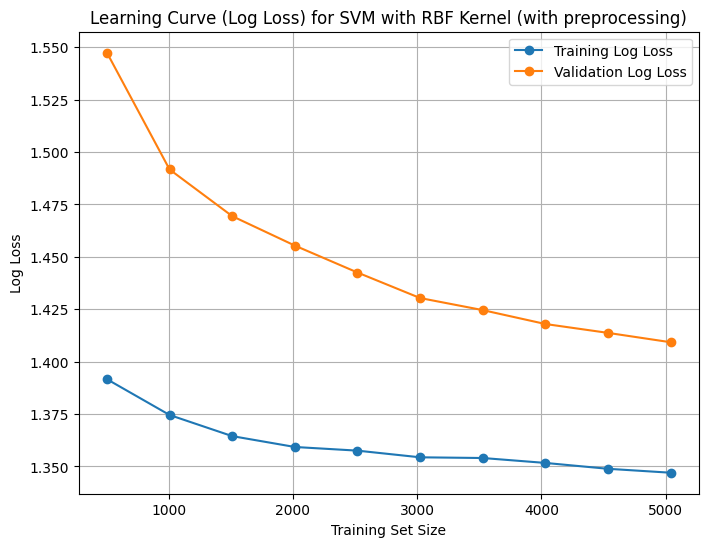

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

svm_rbf = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    shrinking=True,
    tol=1e-3,
    probability=True,
    random_state=42
)

svm_rbf.fit(X_train, y_train)

y_train_prob = svm_rbf.predict_proba(X_train)
train_loss = log_loss(y_train, y_train_prob)
print(f"Train Log Loss: {train_loss:.3f}")


y_val_prob = svm_rbf.predict_proba(X_val)
val_loss = log_loss(y_val, y_val_prob)
print(f"Validation Log Loss: {val_loss:.3f}")


train_sizes, train_scores, val_scores = learning_curve(
    estimator=svm_rbf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)


train_losses_mean = -np.mean(train_scores, axis=1)
val_losses_mean = -np.mean(val_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_losses_mean, label='Training Log Loss', marker='o')
plt.plot(train_sizes, val_losses_mean, label='Validation Log Loss', marker='o')

plt.xlabel('Training Set Size')
plt.ylabel('Log Loss')
plt.title('Learning Curve (Log Loss) for SVM with RBF Kernel (with preprocessing)')
plt.legend()
plt.grid(True)
plt.show()


Train Log Loss: 1.345
Validation Log Loss: 1.387


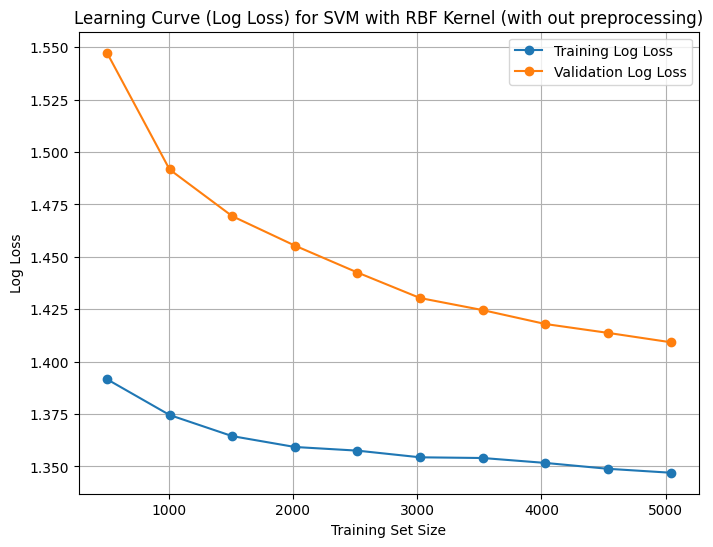

In [ ]:
X_train_np = X_train[['year', 'TEMP', 'PRES', 'DEWP', 'month', 'Iws', 'Is', 'Ir']]

X_val_np = X_val[['year', 'TEMP', 'PRES', 'DEWP', 'month', 'Iws', 'Is', 'Ir']]

svm_rbf = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    shrinking=True,
    tol=1e-3,
    probability=True,
    random_state=42
)

svm_rbf.fit(X_train_np, y_train)

y_train_prob = svm_rbf.predict_proba(X_train_np)
train_loss = log_loss(y_train, y_train_prob)
print(f"Train Log Loss: {train_loss:.3f}")


y_val_prob = svm_rbf.predict_proba(X_val_np)
val_loss = log_loss(y_val, y_val_prob)
print(f"Validation Log Loss: {val_loss:.3f}")


train_sizes, train_scores, val_scores = learning_curve(
    estimator=svm_rbf,
    X=X_train_np,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)


train_losses_mean = -np.mean(train_scores, axis=1)
val_losses_mean = -np.mean(val_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_losses_mean, label='Training Log Loss', marker='o')
plt.plot(train_sizes, val_losses_mean, label='Validation Log Loss', marker='o')

plt.xlabel('Training Set Size')
plt.ylabel('Log Loss')
plt.title('Learning Curve (Log Loss) for SVM with RBF Kernel (with out preprocessing)')
plt.legend()
plt.grid(True)
plt.show()

#Prediction

In [ ]:
file_id = "1HseyPM4cJilpFjGYcHXsC-wODg_AfPNa"

gdown.download(f"https://drive.google.com/uc?id={file_id}", "PRSA_data_2010.1.1-2014.12.31.csv", quiet=False)

df_re = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv", encoding="latin1")

df_re['datetime'] = pd.to_datetime(df_re[['year', 'month', 'day', 'hour']])
df_re.set_index('datetime', inplace=True)

df_re['pm2.5'] = df_re['pm2.5'].bfill(limit=25)
df_re['pm2.5'] = df_re['pm2.5'].interpolate(method='time')


cbwd_mapping = {
    'NW': 0,
    'cv': 1,
    'SE': 2,
    'NE': 3
}
df_re['cbwd_numeric']  = df_re['cbwd'].map(cbwd_mapping)

columns = ['pm2.5', 'TEMP', 'DEWP', 'Iws']
outlier_samples = {}

def outlier_detection(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)

  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  uper_bound = Q3 + 1.5*IQR

  outliers = series[(series<lower_bound)|(series>uper_bound)]
  return len(outliers) >0, outliers

for col in columns:
    outlier_samples_numbers = outlier_detection(df_re[col])

    if len(outlier_samples_numbers) > 0:
        outlier_samples[col] = list(outlier_samples_numbers)
        print(f"Column {col} has {len(outlier_samples_numbers)} outlier samples.")
        print(f"Sample numbers: {list(outlier_samples_numbers)[:5]}")
        print("------------")
    else:
        print(f"Column {col} has no outlier samples.")

print("\nFinal dictionary of real sample numbers for outliers:")
print(outlier_samples)

columns_to_check = ['pm2.5', 'TEMP', 'DEWP', 'Iws']

df_clean_re = df_re.copy()

def remove_outliers_iqr(df, column):
    Q1 = df_re[column].quantile(0.25)
    Q3 = df_re[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df_re[(df_re[column] >= lower_bound) & (df_re[column] <= upper_bound)]


for col in columns_to_check:
    original_size = df_clean_re.shape[0]
    df_re = remove_outliers_iqr(df_re, col)
    new_size = df_clean_re.shape[0]
    print(f"Removed outliers from {col}. Size reduced from {original_size} to {new_size}.")


df_re['pm2.5_lag2'] = df_re['pm2.5'].shift(2)


df_re['pm2.5_lag24'] = df_re['pm2.5'].shift(24)



df_re['pm2.5_lag2'] = df_re['pm2.5_lag2'].fillna(method='bfill')
df_re['pm2.5_lag24'] = df_re['pm2.5_lag24'].fillna(method='bfill')
df_re['datetime'] = pd.to_datetime(df_re[['year', 'month', 'day', 'hour']])
df_re.set_index('datetime', inplace=True)

df_re['pm2.5_rolling_mean24'] = df_re['pm2.5'].rolling(window=24).mean()
df_re['pm2.5_rolling_var24'] = df_re['pm2.5'].rolling(window=24).var()
df_re['pm2.5_rolling_std24'] = df_re['pm2.5'].rolling(window=24).std()

df_re['pm2.5_rolling_mean24'] = df_re['pm2.5_rolling_mean24'].fillna(method='bfill')
df_re['pm2.5_rolling_var24'] = df_re['pm2.5_rolling_var24'].fillna(method='bfill')
df_re['pm2.5_rolling_std24'] = df_re['pm2.5_rolling_std24'].fillna(method='bfill')


df_re['datetime'] = pd.to_datetime(df_re[['year', 'month', 'day', 'hour']])
df_re.set_index('datetime', inplace=True)

df_re['hour_sin'] = np.sin(2 * np.pi * df_re['hour'] / 24)
df_re['hour_cos'] = np.cos(2 * np.pi * df_re['hour'] / 24)

df_re['day_sin'] = np.sin(2 * np.pi * df_re['day'] / 31)
df_re['day_cos'] = np.cos(2 * np.pi * df_re['day'] / 31)

df_re['month_sin'] = np.sin(2 * np.pi * df_re['month'] / 12)
df_re['month_cos'] = np.cos(2 * np.pi * df_re['month'] / 12)





Downloading...
From: https://drive.google.com/uc?id=1HseyPM4cJilpFjGYcHXsC-wODg_AfPNa
To: /content/PRSA_data_2010.1.1-2014.12.31.csv
100%|██████████| 2.01M/2.01M [00:00<00:00, 16.8MB/s]


Column pm2.5 has 2 outlier samples.
Sample numbers: [True, datetime
2010-01-17 21:00:00    317.0
2010-01-17 23:00:00    313.0
2010-01-18 02:00:00    303.0
2010-01-18 03:00:00    349.0
2010-01-18 04:00:00    407.0
                       ...  
2014-12-29 00:00:00    362.0
2014-12-29 01:00:00    372.0
2014-12-29 02:00:00    373.0
2014-12-29 03:00:00    372.0
2014-12-29 04:00:00    318.0
Name: pm2.5, Length: 1836, dtype: float64]
------------
Column TEMP has 2 outlier samples.
Sample numbers: [False, Series([], Name: TEMP, dtype: float64)]
------------
Column DEWP has 2 outlier samples.
Sample numbers: [False, Series([], Name: DEWP, dtype: int64)]
------------
Column Iws has 2 outlier samples.
Sample numbers: [True, datetime
2010-01-02 22:00:00     52.30
2010-01-02 23:00:00     55.43
2010-01-03 00:00:00     58.56
2010-01-03 01:00:00     61.69
2010-01-03 02:00:00     65.71
                        ...  
2014-12-31 19:00:00    231.97
2014-12-31 20:00:00    237.78
2014-12-31 21:00:00    242.70

<ipython-input-81-dbc775ca8af5>:78: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_re['pm2.5_lag2'] = df_re['pm2.5_lag2'].fillna(method='bfill')
<ipython-input-81-dbc775ca8af5>:79: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_re['pm2.5_lag24'] = df_re['pm2.5_lag24'].fillna(method='bfill')
<ipython-input-81-dbc775ca8af5>:87: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_re['pm2.5_rolling_mean24'] = df_re['pm2.5_rolling_mean24'].fillna(method='bfill')
<ipython-input-81-dbc775ca8af5>:88: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_re['pm2.5_rolling_var24'] = df_re['pm2.5_rolling_var24'].fillna(method='bfill')
<ipython-input-8

In [ ]:
df_re.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES  \
datetime                                                                     
2010-01-01 00:00:00   1  2010      1    1     0  129.0   -21 -11.0  1021.0   
2010-01-01 01:00:00   2  2010      1    1     1  129.0   -21 -12.0  1020.0   
2010-01-01 02:00:00   3  2010      1    1     2  129.0   -21 -11.0  1019.0   
2010-01-01 03:00:00   4  2010      1    1     3  129.0   -21 -14.0  1019.0   
2010-01-01 04:00:00   5  2010      1    1     4  129.0   -20 -12.0  1018.0   

                    cbwd  ...  pm2.5_lag24  pm2.5_rolling_mean24  \
datetime                  ...                                      
2010-01-01 00:00:00   NW  ...        129.0                 129.0   
2010-01-01 01:00:00   NW  ...        129.0                 129.0   
2010-01-01 02:00:00   NW  ...        129.0                 129.0   
2010-01-01 03:00:00   NW  ...        129.0                 129.0   
2010-01-01 04:00:00   NW  ...        129.0                 129.0   

                     pm2.5_rolling_var24  pm2.5_rolling_std24  hour_sin  \
datetime                                                                  
2010-01-01 00:00:00                  0.0                  0.0  0.000000   
2010-01-01 01:00:00                  0.0                  0.0  0.258819   
2010-01-01 02:00:00                  0.0                  0.0  0.500000   
2010-01-01 03:00:00                  0.0                  0.0  0.707107   
2010-01-01 04:00:00                  0.0                  0.0  0.866025   

                     hour_cos   day_sin  day_cos  month_sin  month_cos  
datetime                                                                
2010-01-01 00:00:00  1.000000  0.201299  0.97953        0.5   0.866025  
2010-01-01 01:00:00  0.965926  0.201299  0.97953        0.5   0.866025  
2010-01-01 02:00:00  0.866025  0.201299  0.97953        0.5   0.866025  
2010-01-01 03:00:00  0.707107  0.201299  0.97953        0.5   0.866025  
2010-01-01 04:00:00  0.500000  0.201299  0.97953        0.5   0.866025  

[5 rows x 25 columns]

In [ ]:
X_re = df_re.drop(columns='pm2.5')
X_re = X_re.drop(columns='cbwd')
y_re = df_re['pm2.5']

X_train_re, X_temp_re, y_train_re, y_temp_re = train_test_split(
    X_re, y_re, test_size=0.30, random_state=16
)

X_val_re, X_test_re, y_val_re, y_test_re = train_test_split(
    X_temp_re, y_temp_re, test_size=0.50, random_state=16
)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train_re)
X_val = scaler_X.transform(X_val_re)
X_test = scaler_X.transform(X_test_re)


y_train_re = scaler_y.fit_transform(y_train_re.values.reshape(-1, 1)).ravel()
y_val_re = scaler_y.transform(y_val_re.values.reshape(-1, 1)).ravel()
y_test_re = scaler_y.transform(y_test_re.values.reshape(-1, 1)).ravel()

Train MSE: 0.224
Train MAE: 0.318
Train R2: 0.776
val MSE: 0.220
val MAE: 0.315
val R2: 0.782
Test MSE: 0.219
Test MAE: 0.314
Test R2: 0.783


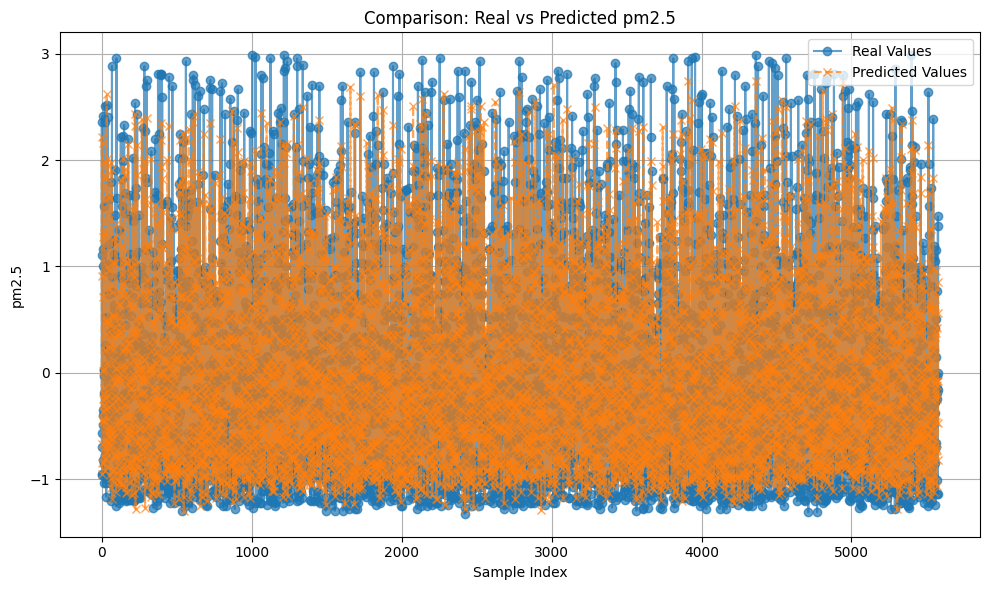

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

svr_rbf = SVR(kernel='rbf', C=10, epsilon=0.01, gamma='scale')
#svr_rfb = SVR(kernel='poly', degree=5, C=0.1, epsilon=0.1, gamma='scale')

svr_rbf.fit(X_train_re, y_train_re)


y_train_pred = svr_rbf.predict(X_train_re)
y_val_pred = svr_rbf.predict(X_val_re)
y_test_pred = svr_rbf.predict(X_test_re)

mse_train = mean_squared_error(y_train_re, y_train_pred)
mae_train = mean_absolute_error(y_train_re, y_train_pred)
r2_train = r2_score(y_train_re, y_train_pred)

mse_val = mean_squared_error(y_val_re, y_val_pred)
mae_val = mean_absolute_error(y_val_re, y_val_pred)
r2_val = r2_score(y_val_re, y_val_pred)

mse = mean_squared_error(y_test_re, y_test_pred)
mae = mean_absolute_error(y_test_re, y_test_pred)
r2 = r2_score(y_test_re, y_test_pred)


print(f"Train MSE: {mse_train:.3f}")
print(f"Train MAE: {mae_train:.3f}")
print(f"Train R2: {r2_train:.3f}")

print(f"val MSE: {mse_val:.3f}")
print(f"val MAE: {mae_val:.3f}")
print(f"val R2: {r2_val:.3f}")

print(f"Test MSE: {mse:.3f}")
print(f"Test MAE: {mae:.3f}")
print(f"Test R2: {r2:.3f}")


plt.figure(figsize=(10, 6))
plt.plot(y_test_re, label='Real Values', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_test_pred, label='Predicted Values', marker='x', linestyle='--', alpha=0.7)
plt.title('Comparison: Real vs Predicted pm2.5')
plt.xlabel('Sample Index')
plt.ylabel('pm2.5')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

SVM with PSO

In [ ]:
pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=c230e73d4a47883d80dfc5c4e1c8f95e3df2b7f1f080a1a5b4360977fe6928d8
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from pyswarm import pso


def objective(params):
    C, gamma = params
    clf = SVC(C=C, gamma=gamma, kernel='rbf')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    return -acc


lb = [0.01, 0.0001]
ub = [1.4, 0.1]


best_params, best_score = pso(objective, lb, ub, swarmsize=15, maxiter=15)

print(f"Best C: {best_params[0]}, Best gamma: {best_params[1]}")


clf_best = SVC(C=best_params[0], gamma=best_params[1], kernel='rbf')
clf_best.fit(X_train, y_train)

y_pred_train = clf_best.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on train data: {acc_train * 100:.2f}%")

y_pred_val = clf_best.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy on Validation data: {acc_val * 100:.2f}%")

y_pred_test = clf_best.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test data: {acc_test * 100:.2f}%")


Stopping search: maximum iterations reached --> 15
Best C: 1.4, Best gamma: 0.08516804252862054
Accuracy on train data: 88.51%
Accuracy on Validation data: 73.11%
Accuracy on test data: 73.63%


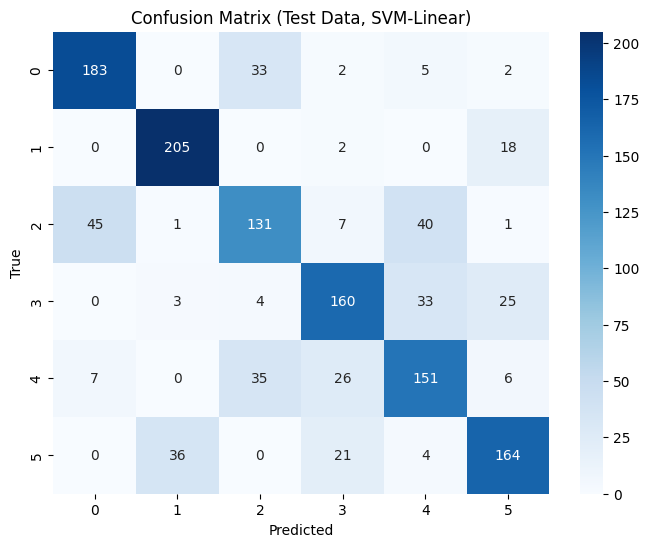


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       225
           1       0.84      0.91      0.87       225
           2       0.65      0.58      0.61       225
           3       0.73      0.71      0.72       225
           4       0.65      0.67      0.66       225
           5       0.76      0.73      0.74       225

    accuracy                           0.74      1350
   macro avg       0.73      0.74      0.73      1350
weighted avg       0.73      0.74      0.73      1350

Test Accuracy: 0.736


In [ ]:
y_test_pred = clf_best.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data, SVM-Linear)')
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

Implementation Paper (Differential Evaluation)

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from scipy.optimize import differential_evolution
import warnings
from sklearn.exceptions import ConvergenceWarning


warnings.filterwarnings("ignore", category=ConvergenceWarning)

warnings.filterwarnings("ignore", category=UserWarning)



X = X_train
y = y_train

def fitness_scipy(params):
    C, gamma = params

    svm = SVC(C=C, gamma=gamma, kernel='rbf', random_state=42)


    scores = cross_val_score(svm, X, y, cv=5, n_jobs=-1)

    return -scores.mean()

C_bounds = (0.1, 1.3)
gamma_bounds = (0.001, 0.01)
bounds = [C_bounds, gamma_bounds]


result = differential_evolution(
    func=fitness_scipy,
    bounds=bounds,
    strategy='rand1bin',
    maxiter=20,
    popsize=20,
    mutation=(0.5, 1),
    recombination=0.7,
    seed=42,
    disp=True,
    workers=-1
)

best_params_de = result.x
best_fitness_de = -result.fun

print("Best parameters (Scipy DE):", best_params_de)
print(f"Best fitness (Scipy DE): {best_fitness_de:.4f}")

differential_evolution step 1: f(x)= -0.6666666666666667
differential_evolution step 2: f(x)= -0.6680952380952382
differential_evolution step 3: f(x)= -0.6680952380952382
differential_evolution step 4: f(x)= -0.6685714285714287
differential_evolution step 5: f(x)= -0.6692063492063494
differential_evolution step 6: f(x)= -0.6692063492063494
differential_evolution step 7: f(x)= -0.6692063492063494
Polishing solution with 'L-BFGS-B'
Best parameters (Scipy DE): [1.27558329 0.00967838]
Best fitness (Scipy DE): 0.6692


In [ ]:
best_C, best_gamma = best_params_de
svm_final = SVC(C=best_C, gamma=best_gamma, kernel='rbf')
svm_final.fit(X, y)

y_pred_train = svm_final.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on train data: {acc_train * 100:.2f}%")

y_pred_val = svm_final.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy on Validation data: {acc_val * 100:.2f}%")

y_pred_test = svm_final.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test data: {acc_test * 100:.2f}%")


Accuracy on train data: 70.49%
Accuracy on Validation data: 70.67%
Accuracy on test data: 67.04%


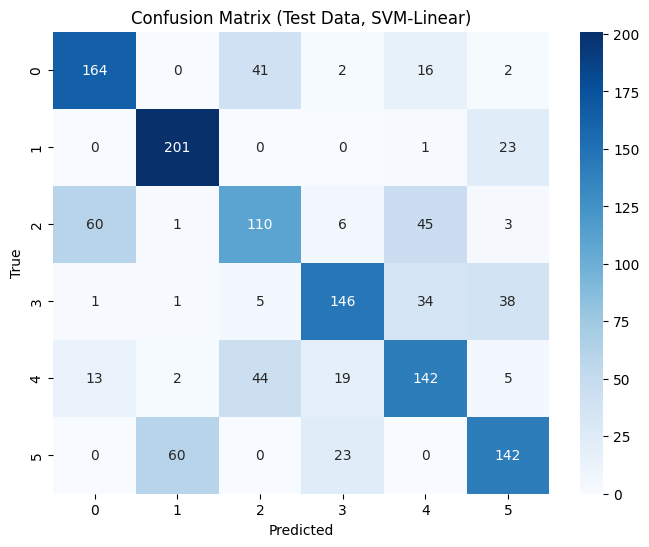


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       225
           1       0.76      0.89      0.82       225
           2       0.55      0.49      0.52       225
           3       0.74      0.65      0.69       225
           4       0.60      0.63      0.61       225
           5       0.67      0.63      0.65       225

    accuracy                           0.67      1350
   macro avg       0.67      0.67      0.67      1350
weighted avg       0.67      0.67      0.67      1350

Test Accuracy: 0.670


In [ ]:
y_test_pred = svm_final.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data, SVM-Linear)')
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")


final produnction

In [ ]:
import requests
import pandas as pd


latitude = 39.91
longitude = 116.40
start_date = '2024-06-01'
end_date = '2024-06-01'


url = (
    f"https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    f"&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,pressure_msl,"
    f"wind_speed_10m,precipitation"
)

response = requests.get(url)
data = response.json()


df = pd.DataFrame(data['hourly'])
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)


df_5 = df.head(5).copy()


df_5['No'] = range(1, 6)
df_5.rename(columns={
    'temperature_2m': 'TEMP',
    'dew_point_2m': 'DEWP',
    'pressure_msl': 'PRES',
    'wind_speed_10m': 'Iws',
    'precipitation': 'Ir'
}, inplace=True)

df_5['Is'] = 0
df_5['pm2.5'] = 50
df_5['cbwd'] = 'North'


df_5['year'] = df_5.index.year
df_5['month'] = df_5.index.month
df_5['day'] = df_5.index.day
df_5['hour'] = df_5.index.hour

print(df_5[['No', 'year', 'month', 'day', 'hour', 'TEMP', 'DEWP', 'PRES', 'Iws', 'Ir', 'Is', 'pm2.5', 'cbwd']])
df_weather = df_5

                     No  year  month  day  hour  TEMP  DEWP    PRES  Iws   Ir  \
time                                                                            
2024-06-01 00:00:00   1  2024      6    1     0  21.7   7.6  1015.7  5.6  0.0   
2024-06-01 01:00:00   2  2024      6    1     1  24.6   6.9  1016.2  6.0  0.0   
2024-06-01 02:00:00   3  2024      6    1     2  27.0   6.2  1015.5  2.5  0.0   
2024-06-01 03:00:00   4  2024      6    1     3  28.9   5.5  1014.7  4.7  0.0   
2024-06-01 04:00:00   5  2024      6    1     4  30.4   3.8  1014.0  5.5  0.0   

                     Is  pm2.5   cbwd  
time                                   
2024-06-01 00:00:00   0     50  North  
2024-06-01 01:00:00   0     50  North  
2024-06-01 02:00:00   0     50  North  
2024-06-01 03:00:00   0     50  North  
2024-06-01 04:00:00   0     50  North  


In [ ]:
df  =df_weather
df['pm2.5_lag2'] = df['pm2.5'].shift(2).fillna(df['pm2.5'].iloc[0])
df['pm2.5_lag24'] = df['pm2.5'].shift(24).fillna(df['pm2.5'].iloc[0])


df['pm2.5_rolling_mean24'] = df['pm2.5'].rolling(window=24, min_periods=1).mean()
df['pm2.5_rolling_var24'] = df['pm2.5'].rolling(window=24, min_periods=1).var().fillna(0)
df['pm2.5_rolling_std24'] = df['pm2.5'].rolling(window=24, min_periods=1).std().fillna(0)


df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)


bins = [0.0, 12.0, 35.4, 55.4, 150.4, 250.4, 500.0]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df['pm2.5_category'] = pd.cut(df['pm2.5'], bins=bins, labels=labels, include_lowest=True, right=True)


le = LabelEncoder()
df['pm2.5_category_encoded'] = le.fit_transform(df['pm2.5_category'])


cbwd_mapping = {'North': 0, 'North-East': 1, 'East': 2, 'South-East': 3,
                 'South': 4, 'South-West': 5, 'West': 6, 'North-West': 7}
df['cbwd_numeric'] = df['cbwd'].map(cbwd_mapping).fillna(-1)

X = df[[
    'No', 'year', 'month', 'day', 'hour',
    'TEMP', 'DEWP', 'PRES', 'Iws', 'Is', 'Ir',
    'cbwd_numeric',
    'pm2.5_lag2', 'pm2.5_lag24',
    'pm2.5_rolling_mean24', 'pm2.5_rolling_var24', 'pm2.5_rolling_std24',
    'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos'
]]
X_filled = X.bfill().ffill()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


y_en = df['pm2.5_category_encoded']


In [ ]:
X = df[[
    'No',
    'year', 'month', 'day', 'hour',
    'TEMP', 'DEWP', 'PRES', 'Iws', 'Is', 'Ir',
    'cbwd_numeric',
    'pm2.5_lag2', 'pm2.5_lag24',
    'pm2.5_rolling_mean24', 'pm2.5_rolling_var24', 'pm2.5_rolling_std24',
    'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos'
]]

y = y_en

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

final production

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


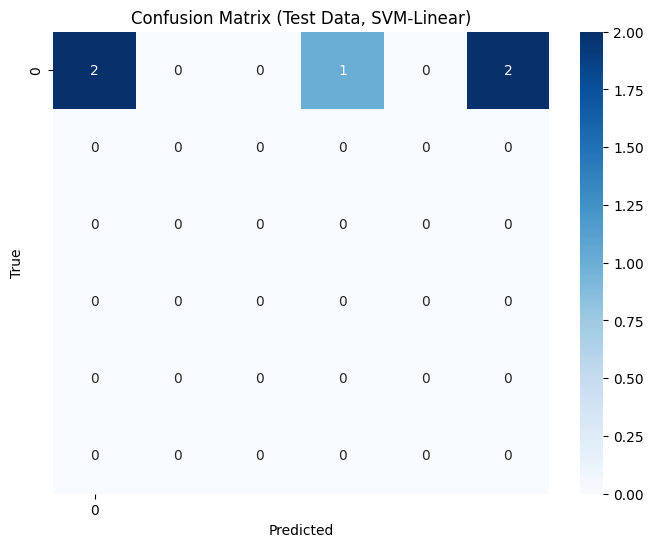


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.40         5
   macro avg       0.33      0.13      0.19         5
weighted avg       1.00      0.40      0.57         5

Test Accuracy: 0.400


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_test_pred = clf_best.predict(X)
cm_test = confusion_matrix(y, y_test_pred, labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data, SVM-Linear)')
plt.show()

print("\nClassification Report on Test Data:")
print(classification_report(y, y_test_pred))

test_accuracy = accuracy_score(y, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")


#Section2

2.1) A

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


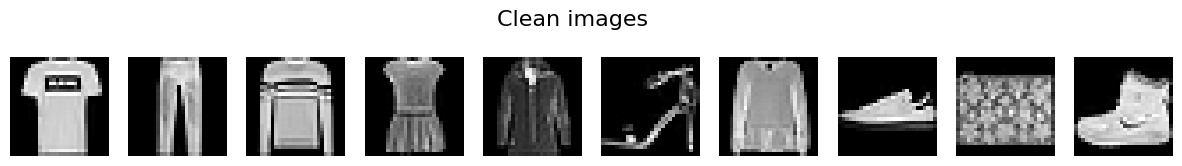

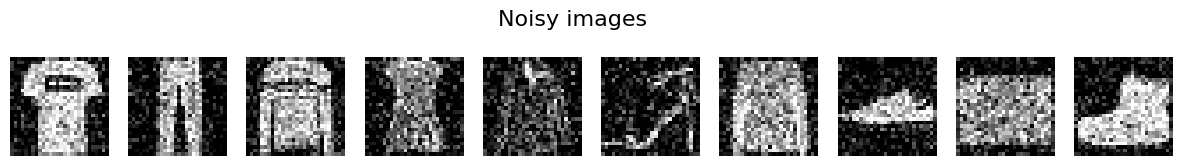

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

unique_classes = np.unique(y_train)
sample_images = []
sample_labels = []

for label in unique_classes:
    idx = np.where(y_train == label)[0][0]
    sample_images.append(x_train[idx])
    sample_labels.append(label)

sample_images = np.array(sample_images)

def show_images(images, title):
    plt.figure(figsize=(15, 2))
    for i, img in enumerate(images):
        plt.subplot(1, 10, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

show_images(sample_images, "Clean images")

def add_gaussian_noise(images, mean=0.0, std=0.2):
    images = images/255.0
    noisy_images = images + np.random.normal(mean, std, images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

noisy_samples = add_gaussian_noise(sample_images)

show_images(noisy_samples, "Noisy images")

In [ ]:
len(x_test)

10000

2.1) B

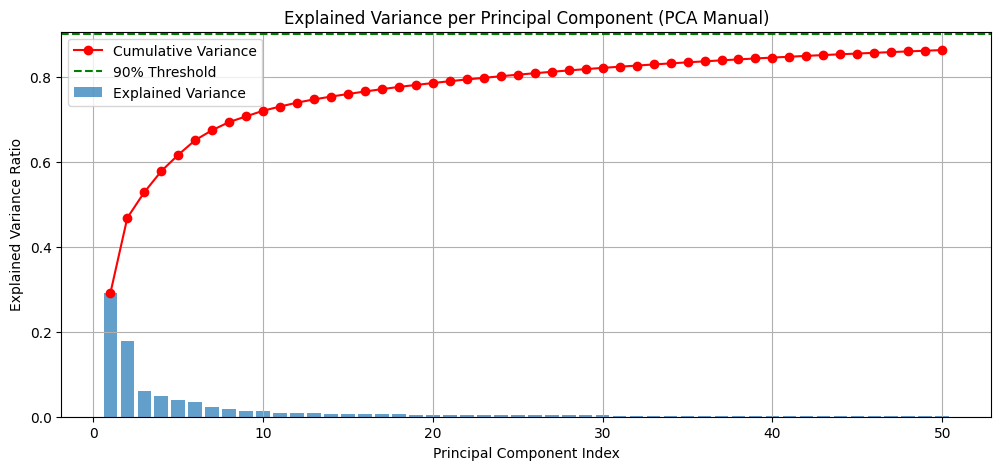

Number of principal components needed to preserve at least 90% variance: 84


In [ ]:
import matplotlib.pyplot as plt

x_train = x_train.reshape(x_train.shape[0], -1).astype("float32")

mean_vector = x_train.mean(axis=0)

X_centered = x_train - mean_vector

n_samples = X_centered.shape[0]
cov_matrix = (1 / n_samples) * (X_centered.T @ X_centered)

def eigen_decomposition(matrix, max_iter=1000, epsilon=1e-10):
    n = matrix.shape[0]
    A = matrix.copy()
    eigenvectors = np.eye(n)

    for i in range(max_iter):

        Q, R = np.linalg.qr(A)
        A = R @ Q
        eigenvectors = eigenvectors @ Q


    eigenvalues = np.diag(A)
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = eigen_decomposition(cov_matrix)


sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(12, 5))
plt.bar(range(1, 51), explained_variance_ratio[:50], alpha=0.7, label='Explained Variance')
plt.plot(range(1, 51), cumulative_variance[:50], marker='o', color='red', label='Cumulative Variance')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% Threshold')
plt.xlabel("Principal Component Index")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance per Principal Component (PCA Manual)")
plt.legend()
plt.grid(True)
plt.show()


num_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of principal components needed to preserve at least 90% variance: {num_components_90}")


2.1) C

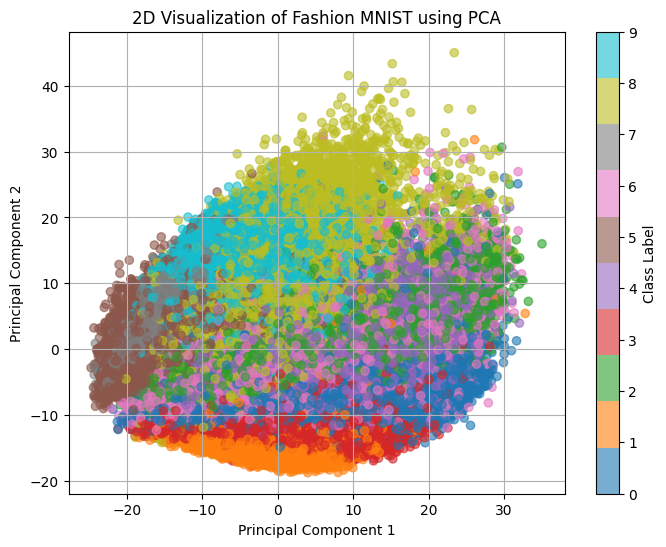

In [ ]:
X_scaled = StandardScaler().fit_transform(x_train.reshape(60000, 28*28))

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_train, cmap='tab10', alpha=0.6)

plt.colorbar(scatter, ticks=range(10), label='Class Label')


plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D Visualization of Fashion MNIST using PCA")

plt.grid(True)
plt.show()

2.1) D

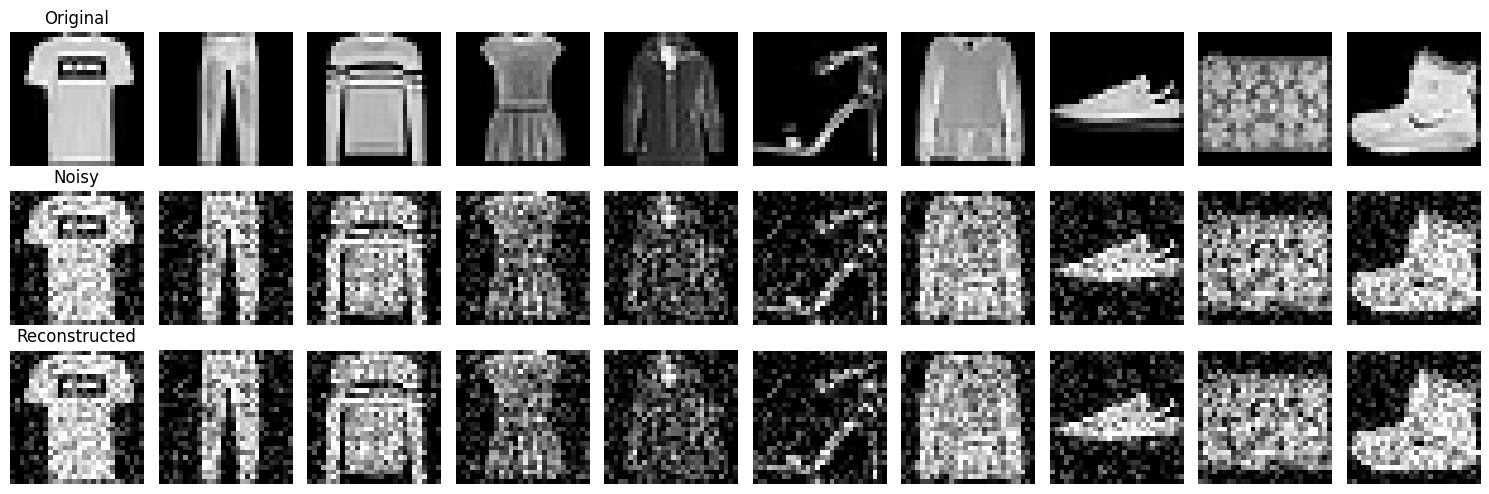

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

unique_classes = np.unique(y_train)
sample_images = []
sample_labels = []

for label in unique_classes:
    idx = np.where(y_train == label)[0][0]
    sample_images.append(x_train[idx])
    sample_labels.append(label)

sample_images = np.array(sample_images)


sample_images = sample_images.astype("float32") / 255.0


noise = np.random.normal(0, 0.2, sample_images.shape)
noisy_images = sample_images + noise
noisy_images = np.clip(noisy_images, 0., 1.)


noisy_flat = noisy_images.reshape(noisy_images.shape[0], -1)


pca = PCA(n_components=10)
noisy_pca = pca.fit_transform(noisy_flat)
reconstructed_flat = pca.inverse_transform(noisy_pca)
reconstructed_images = reconstructed_flat.reshape(-1, 28, 28)


fig, axes = plt.subplots(3, 10, figsize=(15, 5))

for i in range(10):
    axes[0, i].imshow(sample_images[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_title("Original")

    axes[1, i].imshow(noisy_images[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_title("Noisy")

    axes[2, i].imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    axes[2, i].axis('off')
    if i == 0:
        axes[2, i].set_title("Reconstructed")

plt.tight_layout()
plt.show()


2.1) E

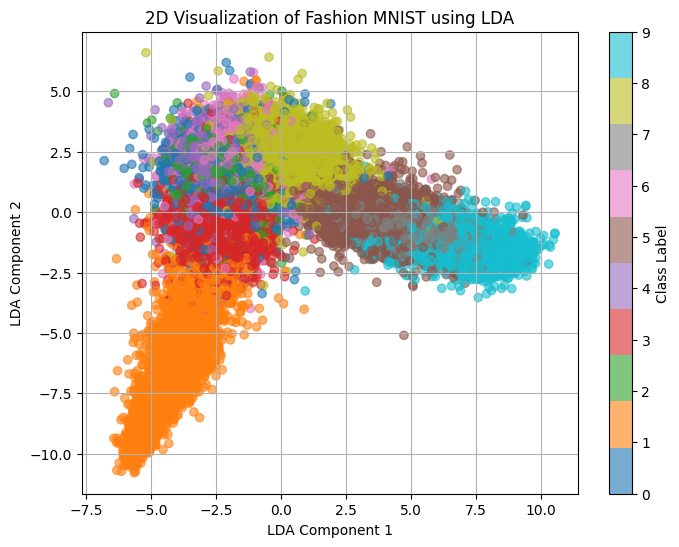

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

x_flat = x_train.reshape(x_train.shape[0], -1).astype("float32") / 255.0

x_scaled = StandardScaler().fit_transform(x_flat)

lda = LDA(n_components=2)
x_lda_2d = lda.fit_transform(x_scaled, y_train)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_lda_2d[:, 0], x_lda_2d[:, 1], c=y_train, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10), label='Class Label')
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("2D Visualization of Fashion MNIST using LDA")
plt.grid(True)
plt.show()


2.1) F

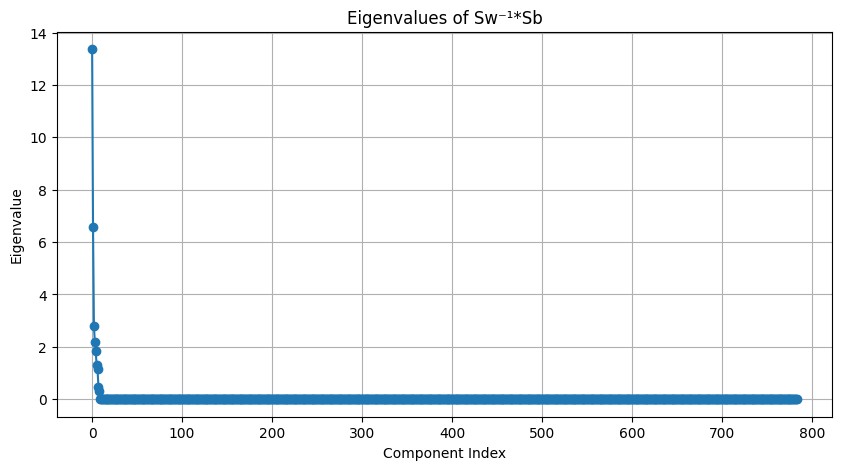

In [ ]:
x_flat = x_train.reshape(x_train.shape[0], -1).astype("float32") / 255.0
x_scaled = StandardScaler().fit_transform(x_flat)
y = y_train

overall_mean = np.mean(x_scaled, axis=0)
classes = np.unique(y)
n_features = x_scaled.shape[1]

Sw = np.zeros((n_features, n_features))
Sb = np.zeros((n_features, n_features))

for c in classes:
    Xc = x_scaled[y == c]
    mean_c = np.mean(Xc, axis=0)


    diff = Xc - mean_c
    Sw += diff.T @ diff


    n_c = Xc.shape[0]
    mean_diff = (mean_c - overall_mean).reshape(-1, 1)
    Sb += n_c * (mean_diff @ mean_diff.T)


from numpy.linalg import inv, eig

Sw_inv = inv(Sw)
J = Sw_inv @ Sb

eigvals, eigvecs = eig(J)

sorted_eigvals = np.sort(eigvals.real)[::-1]

plt.figure(figsize=(10, 5))
plt.plot(sorted_eigvals, marker='o')
plt.title("Eigenvalues of Sw⁻¹*Sb")
plt.xlabel("Component Index")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

2.1) J

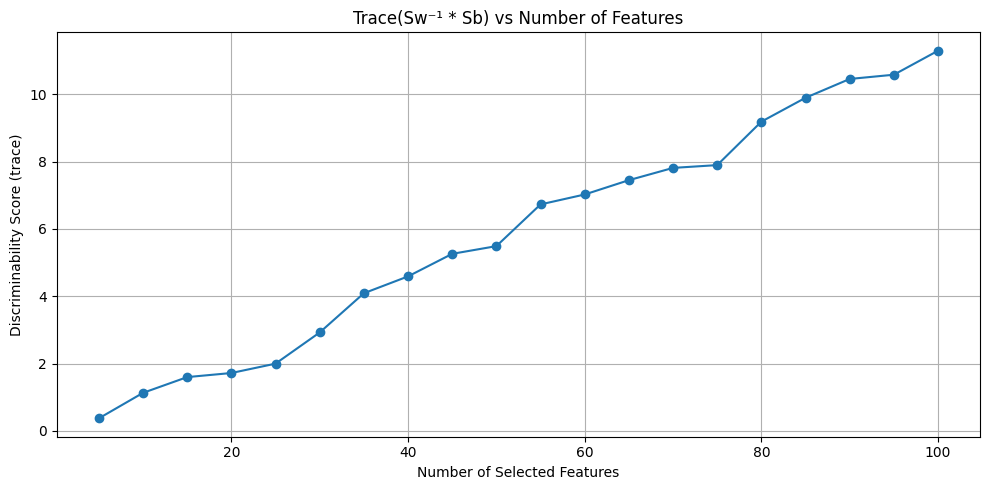

In [ ]:
X = x_train.reshape(x_train.shape[0], -1).astype(np.float32) / 255.0
y = y_train.astype(int)

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Overall mean
overall_mean = np.mean(X_std, axis=0)
classes = np.unique(y)
n_features = X.shape[1]

# Compute full Sw and Sb
Sw_full = np.zeros((n_features, n_features))
Sb_full = np.zeros((n_features, n_features))

for c in classes:
    X_c = X_std[y == c]
    mean_c = np.mean(X_c, axis=0)
    diff = X_c - mean_c
    Sw_full += diff.T @ diff
    n_c = X_c.shape[0]
    mean_diff = (mean_c - overall_mean).reshape(-1, 1)
    Sb_full += n_c * (mean_diff @ mean_diff.T)

# Select features by top variance
variances = np.var(X_std, axis=0)
top_feature_indices = np.argsort(variances)[::-1]

# Evaluate trace(Sw_inv * Sb) for various feature counts
scores = []
feature_counts = range(5, 101, 5)

for k in feature_counts:
    selected = top_feature_indices[:k]
    Sw_k = Sw_full[np.ix_(selected, selected)]
    Sb_k = Sb_full[np.ix_(selected, selected)]

    try:
        score = np.trace(np.linalg.inv(Sw_k) @ Sb_k)
    except np.linalg.LinAlgError:
        score = np.nan  # handle singular matrix

    scores.append(score)

# Plot trace vs number of features
plt.figure(figsize=(10, 5))
plt.plot(feature_counts, scores, marker='o')
plt.title("Trace(Sw⁻¹ * Sb) vs Number of Features")
plt.xlabel("Number of Selected Features")
plt.ylabel("Discriminability Score (trace)")
plt.grid(True)
plt.tight_layout()
plt.show()

2.2 t-SNE (optional)

Starting t-SNE computation...
Iteration 0: KL divergence = 8.6520
Iteration 50: KL divergence = 8.6520
Iteration 100: KL divergence = 8.6516
Iteration 150: KL divergence = 8.6106
Iteration 200: KL divergence = 8.1691
Iteration 250: KL divergence = 7.6601
Iteration 300: KL divergence = 7.3239
Iteration 350: KL divergence = 7.0828
Iteration 400: KL divergence = 6.8948
Iteration 450: KL divergence = 6.7406
Iteration 500: KL divergence = 6.6097
Iteration 550: KL divergence = 6.4961
Iteration 600: KL divergence = 6.3956
Iteration 650: KL divergence = 6.3056
Iteration 700: KL divergence = 6.2240
Iteration 750: KL divergence = 6.1494
Iteration 800: KL divergence = 6.0808
Iteration 850: KL divergence = 6.0171
Iteration 900: KL divergence = 5.9578
Iteration 950: KL divergence = 5.9022
Iteration 1000: KL divergence = 5.8500
Iteration 1050: KL divergence = 5.8007
Iteration 1100: KL divergence = 5.7541
Iteration 1150: KL divergence = 5.7099
Iteration 1200: KL divergence = 5.6678
Iteration 1250: KL

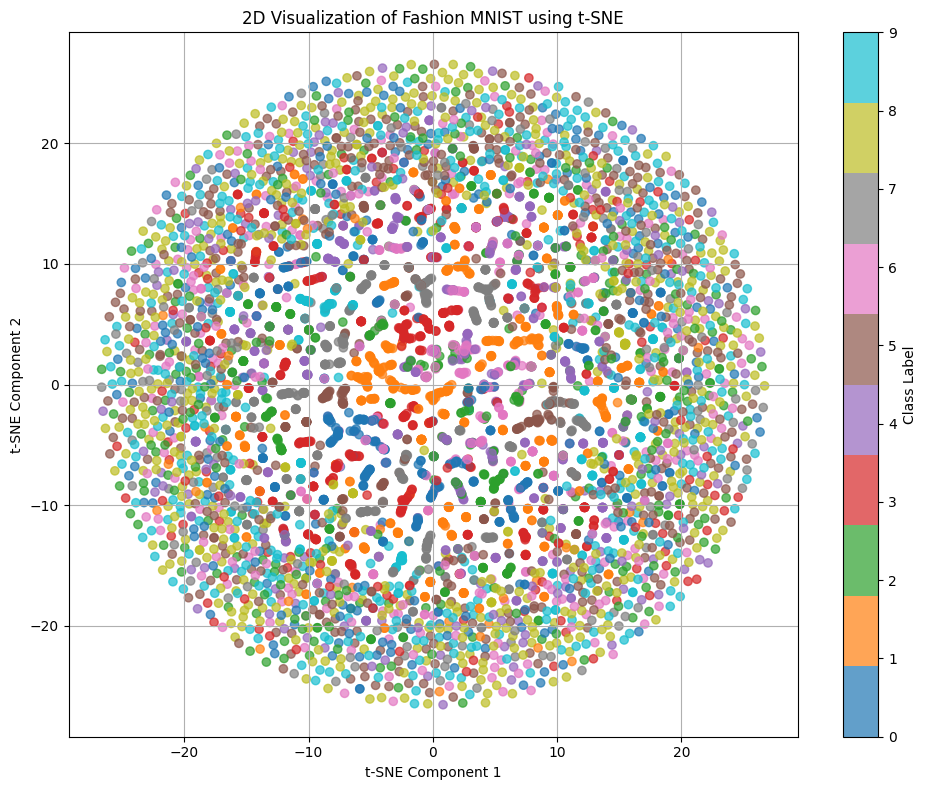

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

def compute_pij(X, sigma=1.0, exaggeration=4.0):
    n = X.shape[0]

    sum_X = np.sum(X**2, axis=1)

    sq_dists = sum_X.reshape(-1, 1) + sum_X - 2 * np.dot(X, X.T)

    sq_dists[sq_dists < 0] = 0

    P_cond = np.exp(-sq_dists / (2 * sigma**2))
    np.fill_diagonal(P_cond, 0)

    row_sums = np.sum(P_cond, axis=1, keepdims=True)

    row_sums[row_sums == 0] = 1e-9
    P_cond /= row_sums

    P = (P_cond + P_cond.T) / (2 * n)

    P *= exaggeration

    P = np.maximum(P, 1e-12)
    P /= np.sum(P)

    return P

def compute_qij(Y):
    sum_Y = np.sum(Y**2, axis=1)
    sq_dists = sum_Y.reshape(-1, 1) + sum_Y - 2 * np.dot(Y, Y.T)

    sq_dists[sq_dists < 0] = 0

    Q = 1 / (1 + sq_dists)
    np.fill_diagonal(Q, 0)

    Q_sum = np.sum(Q)
    if Q_sum == 0:
        Q_sum = 1e-9
    Q /= Q_sum

    Q = np.maximum(Q, 1e-12)

    return Q, sq_dists

def compute_gradient(P, Q, Y, sq_dists):

    inv_dist_plus_one = 1 / (1 + sq_dists + 1e-9)

    factor = (P - Q) * inv_dist_plus_one

    grad = np.zeros_like(Y)
    for i in range(Y.shape[0]):

        grad[i, :] = np.sum(np.expand_dims(factor[i, :], axis=1) * (Y[i, :] - Y), axis=0)


    grad *= 4

    return grad

def tsne(X, dim=2, iterations=500, learning_rate=200, sigma=1.0, exaggeration=4.0, momentum=0.5):
    n = X.shape[0]

    Y = np.random.randn(n, dim) * 1e-4

    P = compute_pij(X, sigma, exaggeration)

    update = np.zeros_like(Y)

    for it in range(iterations):

        Q, sq_dists = compute_qij(Y)

        grad = compute_gradient(P, Q, Y, sq_dists)

        update = momentum * update - learning_rate * grad
        Y += update

        if it == 100:
            P /= exaggeration
            P /= np.sum(P)

        if it % 50 == 0 or it == iterations - 1:

            mask = (P > 1e-12) & (Q > 1e-12)

            cost = np.sum(P[mask] * np.log(P[mask] / Q[mask]))
            print(f"Iteration {it}: KL divergence = {cost:.4f}")


    valid_idx = np.where(~np.isnan(Y).any(axis=1))[0]
    Y_valid = Y[valid_idx]

    return Y_valid, valid_idx


df = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))
df['label'] = y_train


df = df.sample(frac=1, random_state=42).reset_index(drop=True)


balanced_df = df.groupby('label').head(600)


x_train_small = balanced_df.drop('label', axis=1).to_numpy()
y_train_small = balanced_df['label']

y_train_small = y_train_small.reset_index(drop=True)

x_flat = x_train_small.reshape(x_train_small.shape[0], -1).astype("float32") / 255.0


scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_flat)

print("Starting t-SNE computation...")

Y_tsne, valid_idx = tsne(X_scaled, dim=2, iterations=7000, learning_rate=40, sigma=1.0, exaggeration=4.0, momentum=0.5)
print("t-SNE computation finished.")

y_train_valid = y_train_small[valid_idx]


plt.figure(figsize=(10, 8))
scatter = plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=y_train_valid, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Class Label')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("2D Visualization of Fashion MNIST using t-SNE")
plt.grid(True)
plt.tight_layout()
plt.show()
